# Set Up

In [ ]:
# Setup
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

     |████████████████████████████████| 720 kB 23.2 MB/s 
     |████████████████████████████████| 48 kB 3.4 MB/s 
     |████████████████████████████████| 1.2 MB 12.5 MB/s 
     |████████████████████████████████| 187 kB 49.4 MB/s 
     |████████████████████████████████| 55 kB 4.0 MB/s 
     |████████████████████████████████| 51 kB 164 kB/s 
     |████████████████████████████████| 561 kB 46.5 MB/s 
     |████████████████████████████████| 130 kB 49.2 MB/s 
Mounted at /content/gdrive


In [ ]:
# Mount Google Drive to Colab
#from google.colab import drive
#drive.mount('/content/gdrive')

In [ ]:
import os
dir = 'gdrive/MyDrive/data/butterflies'
os.listdir( dir )

['CLASS NAMES.csv',
 'EfficientNetB3-butterflies-0.97.h5',
 'class_dict.csv',
 'butterflies.csv',
 '6 images',
 'test',
 'train',
 'valid',
 'alexnet_baseline_export.pkl']

# Data Preparation

In [ ]:
# dataset from https://www.kaggle.com/gpiosenka/butterfly-images40-species
import os
os.listdir( "gdrive/MyDrive/data" )

['ButterflyImageClassification_Kaggle.zip',
 'Copy of Amazon trained_model.pth',
 'books.zip',
 'ratings.zip',
 'goodreads_library_export.csv',
 'goodreads_library_export-2.csv',
 'recommender',
 'mt.zip',
 'med_transcripts',
 'butterflies']

In [ ]:
# delete butterflies directory if it exists
import shutil
dir = 'gdrive/MyDrive/data/butterflies'
try:
  shutil.rmtree(dir)
  print(dir + " deleted!")
except:
  print("Directory must not exist!")  

gdrive/MyDrive/data/butterflies deleted!


In [ ]:
# Unzip the data set
!unzip "gdrive/MyDrive/data/ButterflyImageClassification_Kaggle.zip" -d "/content/gdrive/MyDrive/data/butterflies" 
print( "\n\n" )
os.listdir( )

Streaming output truncated to the last 5000 lines.
  inflating: /content/gdrive/MyDrive/data/butterflies/train/JULIA/045.jpg  
  inflating: /content/gdrive/MyDrive/data/butterflies/train/JULIA/046.jpg  
  inflating: /content/gdrive/MyDrive/data/butterflies/train/JULIA/047.jpg  
  inflating: /content/gdrive/MyDrive/data/butterflies/train/JULIA/048.jpg  
  inflating: /content/gdrive/MyDrive/data/butterflies/train/JULIA/049.jpg  
  inflating: /content/gdrive/MyDrive/data/butterflies/train/JULIA/050.jpg  
  inflating: /content/gdrive/MyDrive/data/butterflies/train/JULIA/051.jpg  
  inflating: /content/gdrive/MyDrive/data/butterflies/train/JULIA/052.jpg  
  inflating: /content/gdrive/MyDrive/data/butterflies/train/JULIA/053.jpg  
  inflating: /content/gdrive/MyDrive/data/butterflies/train/JULIA/054.jpg  
  inflating: /content/gdrive/MyDrive/data/butterflies/train/JULIA/055.jpg  
  inflating: /content/gdrive/MyDrive/data/butterflies/train/JULIA/056.jpg  
  inflating: /content/gdrive/MyDrive/

['.config', 'gdrive', 'sample_data']

In [ ]:
# Let's see what's in the extracted data
print(f"root butterflies directory:\n{os.listdir('gdrive/MyDrive/data/butterflies')}")
print(f"\n\ntrain directory:\n{os.listdir('gdrive/MyDrive/data/butterflies/train')}")
print(f"\n\nvalid directory:\n{os.listdir('gdrive/MyDrive/data/butterflies/valid')}")
print(f"\n\ntrain MONARCH directory:\n{os.listdir('gdrive/MyDrive/data/butterflies/train/MONARCH')}")
print(f"\n\nvalid MONARCH directory:\n{os.listdir('gdrive/MyDrive/data/butterflies/valid/MONARCH')}")

root butterflies directory:
['6 images', 'CLASS NAMES.csv', 'EfficientNetB3-butterflies-0.97.h5', 'butterflies.csv', 'class_dict.csv', 'test', 'train', 'valid']


train directory:
['ADONIS', 'AFRICAN GIANT SWALLOWTAIL', 'AMERICAN SNOOT', 'AN 88', 'APPOLLO', 'ATALA', 'BANDED ORANGE HELICONIAN', 'BANDED PEACOCK', 'BECKERS WHITE', 'BLACK HAIRSTREAK', 'BLUE MORPHO', 'BLUE SPOTTED CROW', 'BROWN SIPROETA', 'CABBAGE WHITE', 'CAIRNS BIRDWING', 'CHECQUERED SKIPPER', 'CHESTNUT', 'CLEOPATRA', 'CLODIUS PARNASSIAN', 'CLOUDED SULPHUR', 'COMMON BANDED AWL', 'COMMON WOOD-NYMPH', 'COPPER TAIL', 'CRECENT', 'CRIMSON PATCH', 'DANAID EGGFLY', 'EASTERN COMA', 'EASTERN DAPPLE WHITE', 'EASTERN PINE ELFIN', 'ELBOWED PIERROT', 'GOLD BANDED', 'GREAT EGGFLY', 'GREAT JAY', 'GREEN CELLED CATTLEHEART', 'GREY HAIRSTREAK', 'INDRA SWALLOW', 'IPHICLUS SISTER', 'JULIA', 'LARGE MARBLE', 'MALACHITE', 'MANGROVE SKIPPER', 'MESTRA', 'METALMARK', 'MILBERTS TORTOISESHELL', 'MONARCH', 'MOURNING CLOAK', 'ORANGE OAKLEAF', 'ORANGE 

In [ ]:
# Folder names are the labels.  
# Let's extract the labels from the validation set
labels = os.listdir('gdrive/MyDrive/data/butterflies/valid')
print(f"There are {len(labels)} categories of butterflies.")

There are 75 categories of butterflies.


In [ ]:
# From Kaggle, we know that there 5 photos of each butterfly type in the validation set and 5 of each in the test set.
# The numbers in the traning set are varied.
# How varied?
from pathlib import Path

path = Path('gdrive/MyDrive/data/butterflies/train')
traincounts = {}
for label in labels:
  p = path/label
  lp = os.listdir(p)
  traincounts[label] = len(lp)

print(f"The butterfly category with the least number of images ({min(traincounts.values())}) is {min(traincounts, key=traincounts.get)}.")
print(f"The butterfly category with the most number of images ({max(traincounts.values())}) is {max(traincounts, key=traincounts.get)}.")

The butterfly category with the least number of images (102) is WOOD SATYR.
The butterfly category with the most number of images (187) is MOURNING CLOAK.


In [ ]:
# Let's move a random 15 images for each butterfly category to the validation set, so we have 20 of each in the validation set to better measure the models' performances.
# To make sure we're not overwriting filenames (ie, "1.jpg" overwriting "1.jpg"), let's first add some extra digits to the validation set filenames.

path = Path('gdrive/MyDrive/data/butterflies/valid')
for label in labels:
  p = path/label
  for file in os.listdir(p):
    floc = p/file
    if len(file) > 5:
      print("Filename is already converted:  " + file)
    else:
      new_name = '000' + file
      print(f"'{file}' renamed to '{new_name}'")
      new_name = p/new_name
      os.rename(floc, new_name)

'1.jpg' renamed to '0001.jpg'
'2.jpg' renamed to '0002.jpg'
'3.jpg' renamed to '0003.jpg'
'4.jpg' renamed to '0004.jpg'
'5.jpg' renamed to '0005.jpg'
'1.jpg' renamed to '0001.jpg'
'2.jpg' renamed to '0002.jpg'
'3.jpg' renamed to '0003.jpg'
'4.jpg' renamed to '0004.jpg'
'5.jpg' renamed to '0005.jpg'
'1.jpg' renamed to '0001.jpg'
'2.jpg' renamed to '0002.jpg'
'3.jpg' renamed to '0003.jpg'
'4.jpg' renamed to '0004.jpg'
'5.jpg' renamed to '0005.jpg'
'1.jpg' renamed to '0001.jpg'
'2.jpg' renamed to '0002.jpg'
'3.jpg' renamed to '0003.jpg'
'4.jpg' renamed to '0004.jpg'
'5.jpg' renamed to '0005.jpg'
'1.jpg' renamed to '0001.jpg'
'2.jpg' renamed to '0002.jpg'
'3.jpg' renamed to '0003.jpg'
'4.jpg' renamed to '0004.jpg'
'5.jpg' renamed to '0005.jpg'
'1.jpg' renamed to '0001.jpg'
'2.jpg' renamed to '0002.jpg'
'3.jpg' renamed to '0003.jpg'
'4.jpg' renamed to '0004.jpg'
'5.jpg' renamed to '0005.jpg'
'1.jpg' renamed to '0001.jpg'
'2.jpg' renamed to '0002.jpg'
'3.jpg' renamed to '0003.jpg'
'4.jpg' re

In [ ]:
# move 15 random images from each validation folder

path = Path('gdrive/MyDrive/data/butterflies/train')
moveto = Path('gdrive/MyDrive/data/butterflies/valid')

for label in labels:
  pt = path/label
  pv = moveto/label
  tfiles = os.listdir(pt)
  vfiles = os.listdir(pv)
  if (len(vfiles)) >= 20:
    print(f"There are already 20 or more images in {pv}")
  else:
    rand_files = random.sample(tfiles, 15)
    for f in rand_files:
      src = pt/f 
      dst = pv/f
      shutil.move(src,dst)

# Verify on one folder
print(f"\n\nvalid CLEOPATRA directory:\n{os.listdir('gdrive/MyDrive/data/butterflies/valid/CLEOPATRA')}")



valid CLEOPATRA directory:
['004.jpg', '013.jpg', '020.jpg', '024.jpg', '026.jpg', '036.jpg', '047.jpg', '049.jpg', '050.jpg', '064.jpg', '072.jpg', '109.jpg', '114.jpg', '115.jpg', '119.jpg', '0001.jpg', '0002.jpg', '0003.jpg', '0004.jpg', '0005.jpg']


In [ ]:
# Let's rename the files so it's easier to identify the butterflies categories for us non-butterfly experts.

path = Path('gdrive/MyDrive/data/butterflies/valid')
for label in labels:
  p = path/label
  for file in os.listdir(p):
    floc = p/file
    try:
      basefilename = os.path.splitext(os.path.basename(floc))[0]
      float(basefilename)
      new_name = label + '__' + 'val' + file
      print(f"'{basefilename}.jpg' renamed to '{new_name}'")
      new_name = p/new_name
      os.rename(floc, new_name)
    except ValueError:
      print("Filename is already converted:  " + file)

'04.jpg' renamed to 'ADONIS__val04.jpg'
'101.jpg' renamed to 'ADONIS__val101.jpg'
'103.jpg' renamed to 'ADONIS__val103.jpg'
'104.jpg' renamed to 'ADONIS__val104.jpg'
'107.jpg' renamed to 'ADONIS__val107.jpg'
'117.jpg' renamed to 'ADONIS__val117.jpg'
'12.jpg' renamed to 'ADONIS__val12.jpg'
'123.jpg' renamed to 'ADONIS__val123.jpg'
'28.jpg' renamed to 'ADONIS__val28.jpg'
'43.jpg' renamed to 'ADONIS__val43.jpg'
'49.jpg' renamed to 'ADONIS__val49.jpg'
'55.jpg' renamed to 'ADONIS__val55.jpg'
'60.jpg' renamed to 'ADONIS__val60.jpg'
'68.jpg' renamed to 'ADONIS__val68.jpg'
'88.jpg' renamed to 'ADONIS__val88.jpg'
'0001.jpg' renamed to 'ADONIS__val0001.jpg'
'0002.jpg' renamed to 'ADONIS__val0002.jpg'
'0003.jpg' renamed to 'ADONIS__val0003.jpg'
'0004.jpg' renamed to 'ADONIS__val0004.jpg'
'0005.jpg' renamed to 'ADONIS__val0005.jpg'
'004.jpg' renamed to 'AFRICAN GIANT SWALLOWTAIL__val004.jpg'
'005.jpg' renamed to 'AFRICAN GIANT SWALLOWTAIL__val005.jpg'
'012.jpg' renamed to 'AFRICAN GIANT SWALLOWTAI

In [ ]:
# Verify the rename was successful for validation data
print(f"\ntrain QUESTION MARK directory:\n{os.listdir('gdrive/MyDrive/data/butterflies/train/QUESTION MARK')}")
print(f"\n\nvalid QUESTION MARK directory:\n{os.listdir('gdrive/MyDrive/data/butterflies/valid/QUESTION MARK')}")


train QUESTION MARK directory:
['001.jpg', '002.jpg', '003.jpg', '004.jpg', '005.jpg', '006.jpg', '008.jpg', '011.jpg', '012.jpg', '013.jpg', '014.jpg', '016.jpg', '017.jpg', '018.jpg', '019.jpg', '020.jpg', '021.jpg', '022.jpg', '023.jpg', '025.jpg', '026.jpg', '027.jpg', '028.jpg', '029.jpg', '030.jpg', '031.jpg', '032.jpg', '034.jpg', '035.jpg', '036.jpg', '037.jpg', '038.jpg', '039.jpg', '040.jpg', '041.jpg', '042.jpg', '043.jpg', '045.jpg', '046.jpg', '047.jpg', '048.jpg', '049.jpg', '050.jpg', '051.jpg', '053.jpg', '054.jpg', '055.jpg', '056.jpg', '058.jpg', '059.jpg', '060.jpg', '064.jpg', '065.jpg', '066.jpg', '067.jpg', '068.jpg', '069.jpg', '070.jpg', '071.jpg', '072.jpg', '073.jpg', '075.jpg', '076.jpg', '077.jpg', '078.jpg', '079.jpg', '080.jpg', '082.jpg', '083.jpg', '084.jpg', '085.jpg', '086.jpg', '087.jpg', '088.jpg', '089.jpg', '090.jpg', '091.jpg', '092.jpg', '093.jpg', '094.jpg', '095.jpg', '096.jpg', '097.jpg', '098.jpg', '099.jpg', '100.jpg', '101.jpg', '102.jpg',

In [ ]:
# do the same for training data

path = Path('gdrive/MyDrive/data/butterflies/train')
for label in labels:
  p = path/label
  for file in os.listdir(p):
    floc = p/file
    try:
      basefilename = os.path.splitext(os.path.basename(floc))[0]
      float(basefilename)
      new_name = label + '__' + 'trn' + file
      print(f"'{basefilename}.jpg' renamed to '{new_name}'")
      new_name = p/new_name
      os.rename(floc, new_name)
    except ValueError:
      print("Filename is already converted:  " + file)

Streaming output truncated to the last 5000 lines.
'076.jpg' renamed to 'EASTERN PINE ELFIN__trn076.jpg'
'077.jpg' renamed to 'EASTERN PINE ELFIN__trn077.jpg'
'078.jpg' renamed to 'EASTERN PINE ELFIN__trn078.jpg'
'079.jpg' renamed to 'EASTERN PINE ELFIN__trn079.jpg'
'080.jpg' renamed to 'EASTERN PINE ELFIN__trn080.jpg'
'081.jpg' renamed to 'EASTERN PINE ELFIN__trn081.jpg'
'082.jpg' renamed to 'EASTERN PINE ELFIN__trn082.jpg'
'083.jpg' renamed to 'EASTERN PINE ELFIN__trn083.jpg'
'084.jpg' renamed to 'EASTERN PINE ELFIN__trn084.jpg'
'086.jpg' renamed to 'EASTERN PINE ELFIN__trn086.jpg'
'087.jpg' renamed to 'EASTERN PINE ELFIN__trn087.jpg'
'088.jpg' renamed to 'EASTERN PINE ELFIN__trn088.jpg'
'089.jpg' renamed to 'EASTERN PINE ELFIN__trn089.jpg'
'091.jpg' renamed to 'EASTERN PINE ELFIN__trn091.jpg'
'092.jpg' renamed to 'EASTERN PINE ELFIN__trn092.jpg'
'093.jpg' renamed to 'EASTERN PINE ELFIN__trn093.jpg'
'094.jpg' renamed to 'EASTERN PINE ELFIN__trn094.jpg'
'095.jpg' renamed to 'EASTERN P

In [ ]:
# Verify the rename was successful for training data
print(f"\ntrain AN 88 directory:\n{os.listdir('gdrive/MyDrive/data/butterflies/train/AN 88')}")


train AN 88 directory:
['AN 88__trn01.jpg', 'AN 88__trn02.jpg', 'AN 88__trn03.jpg', 'AN 88__trn04.jpg', 'AN 88__trn05.jpg', 'AN 88__trn07.jpg', 'AN 88__trn08.jpg', 'AN 88__trn09.jpg', 'AN 88__trn10.jpg', 'AN 88__trn101.jpg', 'AN 88__trn103.jpg', 'AN 88__trn104.jpg', 'AN 88__trn106.jpg', 'AN 88__trn107.jpg', 'AN 88__trn108.jpg', 'AN 88__trn109.jpg', 'AN 88__trn11.jpg', 'AN 88__trn110.jpg', 'AN 88__trn111.jpg', 'AN 88__trn112.jpg', 'AN 88__trn113.jpg', 'AN 88__trn114.jpg', 'AN 88__trn115.jpg', 'AN 88__trn116.jpg', 'AN 88__trn117.jpg', 'AN 88__trn118.jpg', 'AN 88__trn119.jpg', 'AN 88__trn12.jpg', 'AN 88__trn120.jpg', 'AN 88__trn13.jpg', 'AN 88__trn14.jpg', 'AN 88__trn15.jpg', 'AN 88__trn16.jpg', 'AN 88__trn17.jpg', 'AN 88__trn18.jpg', 'AN 88__trn19.jpg', 'AN 88__trn20.jpg', 'AN 88__trn21.jpg', 'AN 88__trn22.jpg', 'AN 88__trn25.jpg', 'AN 88__trn26.jpg', 'AN 88__trn28.jpg', 'AN 88__trn29.jpg', 'AN 88__trn30.jpg', 'AN 88__trn31.jpg', 'AN 88__trn32.jpg', 'AN 88__trn33.jpg', 'AN 88__trn34.jpg

In [ ]:
os.listdir(dir)

['6 images',
 'CLASS NAMES.csv',
 'EfficientNetB3-butterflies-0.97.h5',
 'butterflies.csv',
 'class_dict.csv',
 'test',
 'train',
 'valid']

In [ ]:
# Lets create a data block -- this is a wrapper around the original data to make it easier to get to a normalized view
block = DataBlock( # https://docs.fast.ai/data.block.html
    blocks = ( ImageBlock, CategoryBlock ), # x = image, y = label
    get_items = get_image_files, # items are images
    splitter =  GrandparentSplitter(),   # already split into train and valid sets
    get_y = parent_label,  # uses folder name as label
    #get_y = using_attr( RegexLabeller( r"^[^__]+" ), "name" ), # should match everything before the two underscores
    item_tfms = Resize( 224 ), # apply this to each item -- verify that the dimensions are the same, even though this dataset says they are they aren't
    batch_tfms = aug_transforms( ) #  augmentation transforms -- https://docs.fast.ai/vision.augment.html#aug_transforms
    )

# Lets use the data block to create a data loader
loaders = block.dataloaders( dir )
print( f"loaders:\n{loaders}" )

loaders:


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


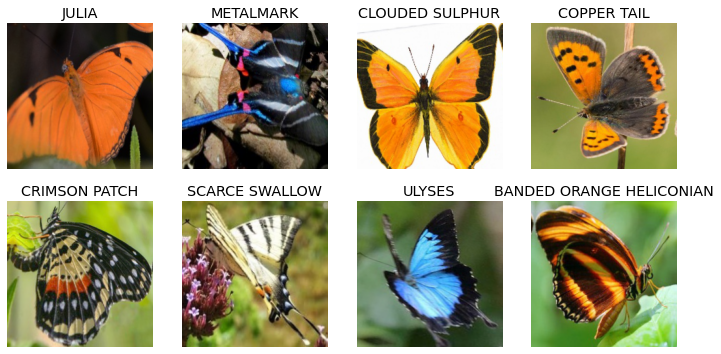

In [ ]:
# check the datablock
loaders.show_batch(max_n=8, nrows=2, ncols=4)

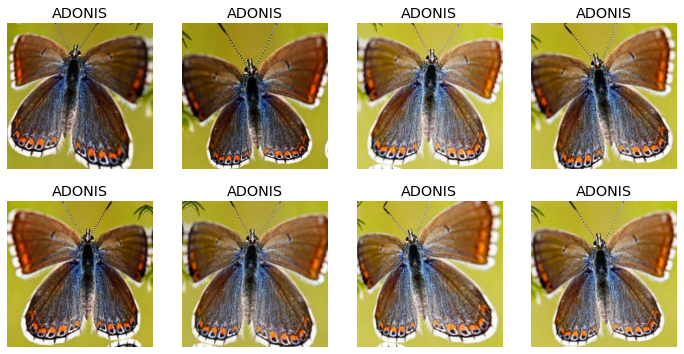

In [ ]:
# see some of the augmentations
loaders.show_batch(max_n=8, nrows=2, ncols=4, unique=True)

In [ ]:
# Verify datablock setup
block.summary(dir)

Setting-up type transforms pipelines
Found 10041 items
2 datasets of sizes 8160,1500
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      gdrive/MyDrive/data/butterflies/train/ADONIS/ADONIS__trn01.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=224x224
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      gdrive/MyDrive/data/butterflies/train/ADONIS/ADONIS__trn01.jpg
    applying parent_label gives
      ADONIS
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=224x224, TensorCategory(0))


Found 10041 items
2 datasets of sizes 8160,1500
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

# Baseline Learner using Alexnet - 87.7% accuracy

In [ ]:
# Let's create a learner following the example from Canvas
learner = [] # reset learner
learner = cnn_learner( 
    loaders, # where the data comes from
    alexnet, # one of simplest pre-trained models (https://pytorch.org/vision/stable/models.html)
    metrics = [error_rate, accuracy] # supplementary metrics to display while training
    )

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [ ]:
# Lets train for a single epoch to confirm all things are set up properly
# First, make some empty lists to store validation losses and training losses as we go
val_losses = []
train_losses = []

learner.fine_tune( 1 )

loss_vals = learner.recorder.values
train_losses.append(loss_vals[0][0])
val_losses.append(loss_vals[0][1])

print(train_losses)
print(val_losses)

[1.0267258882522583]
[0.6146435141563416]


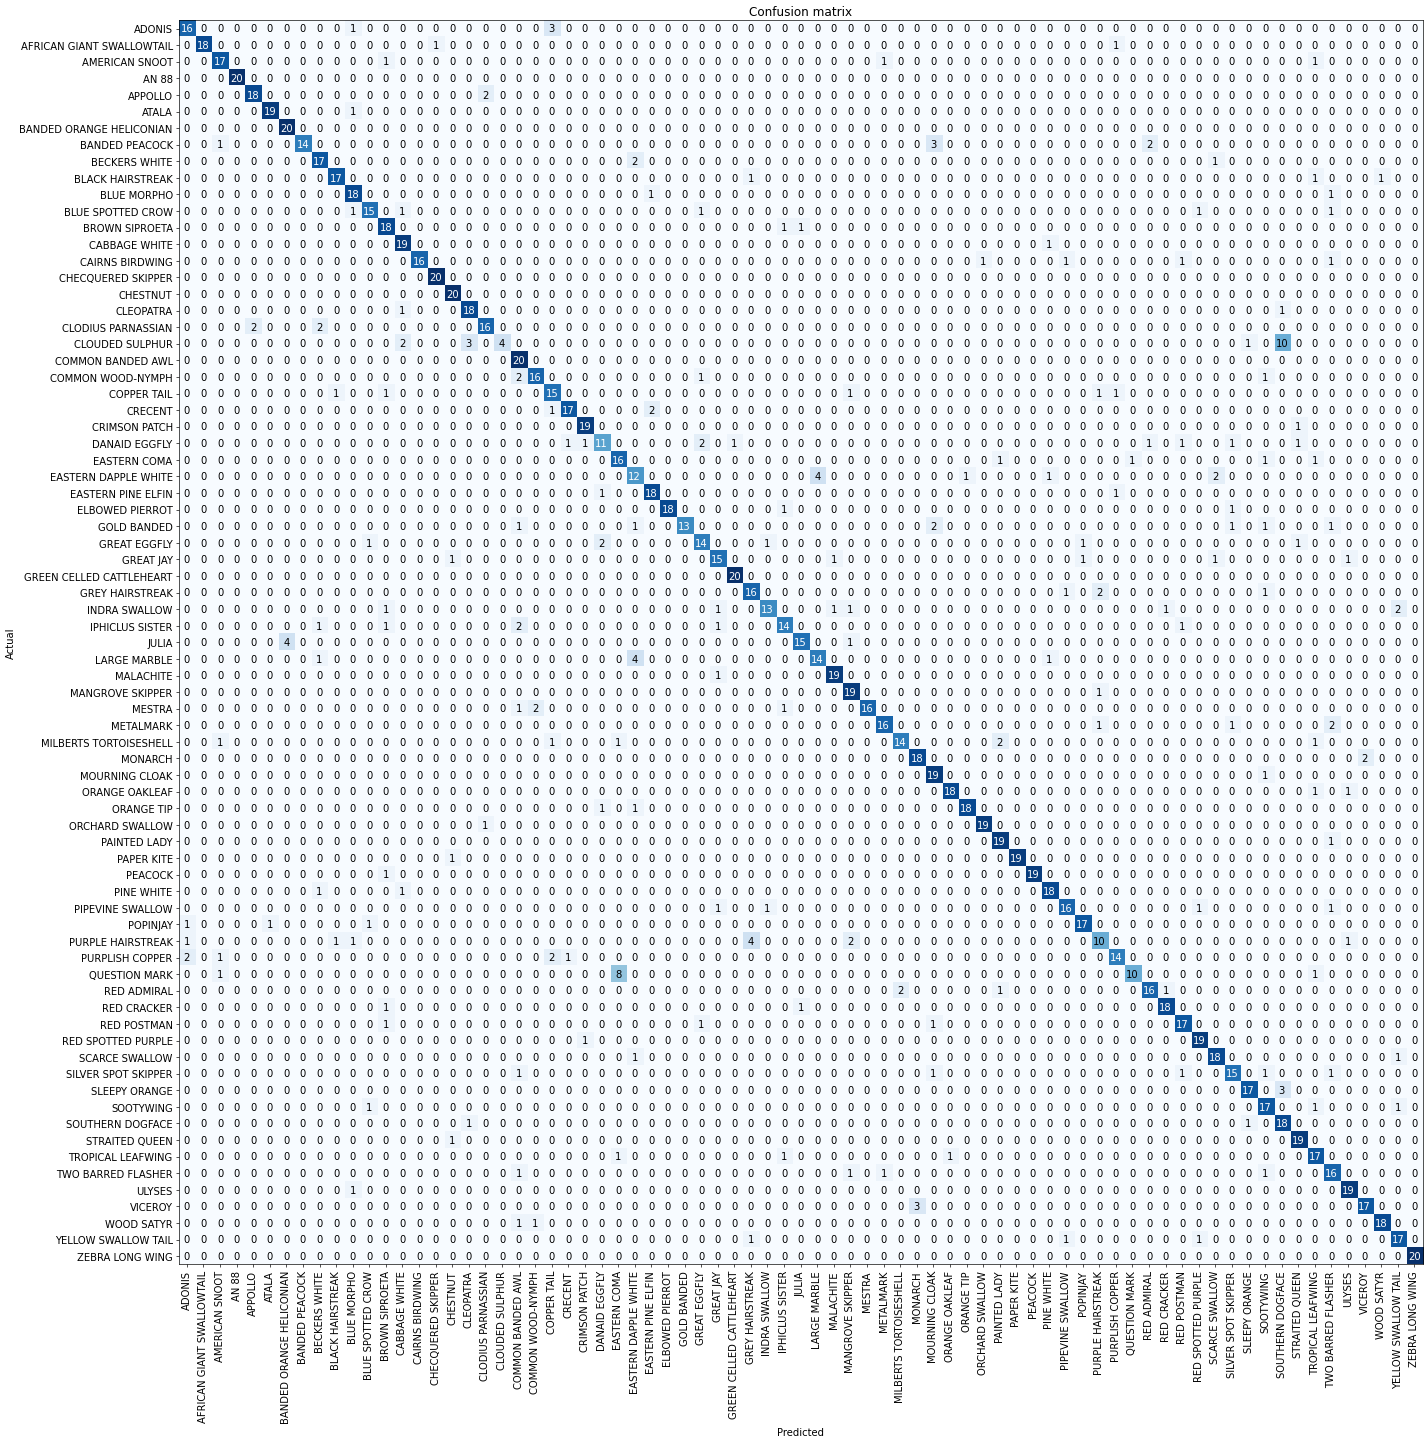

In [ ]:
#  What is our starting state?
interpretation = ClassificationInterpretation.from_learner( learner )
interpretation.plot_confusion_matrix( figsize = ( 24, 24 ), dpi = 60 )

In [ ]:
# Ok, that's a giant confusion matrix.
# Look at the most confused

print(len(interpretation.most_confused(min_val=3) )) # how many in the most confused set
interpretation.most_confused(min_val=3)  # show those where they were confused with another type 3 times or more

11


[('CLOUDED SULPHUR', 'SOUTHERN DOGFACE', 10),
 ('QUESTION MARK', 'EASTERN COMA', 8),
 ('EASTERN DAPPLE WHITE', 'LARGE MARBLE', 4),
 ('JULIA', 'BANDED ORANGE HELICONIAN', 4),
 ('LARGE MARBLE', 'EASTERN DAPPLE WHITE', 4),
 ('PURPLE HAIRSTREAK', 'GREY HAIRSTREAK', 4),
 ('ADONIS', 'COPPER TAIL', 3),
 ('BANDED PEACOCK', 'MOURNING CLOAK', 3),
 ('CLOUDED SULPHUR', 'CLEOPATRA', 3),
 ('SLEEPY ORANGE', 'SOUTHERN DOGFACE', 3),
 ('VICEROY', 'MONARCH', 3)]

LR suggestion = 1.10e-04


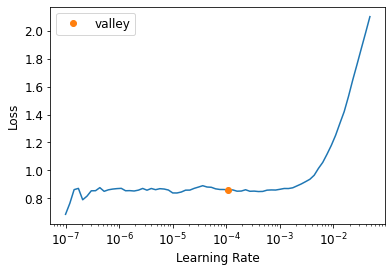

In [ ]:
# What's a good learning rate for this model-problem?
lr_suggestion = learner.lr_find( )
print( f"LR suggestion = {lr_suggestion[ 0 ]:.2e}" )

In [ ]:
# take suggested rate or adjust?
lr_suggested = lr_suggestion[ 0 ]

In [ ]:
# We could tinker in more detail with the layer training, but let's just run 
# fine_tune a couple of times with the preferred learning rate and see if that 
# gets us to a good spot

for i in range( 5 ):
  print( f"\n\nfine tuning iteration #{i+2}" )
  learner.fine_tune( 1, base_lr = lr_suggested )
  loss_vals = learner.recorder.values
  train_losses.append(loss_vals[0][0])
  val_losses.append(loss_vals[0][1])

print(train_losses)
print(val_losses)               



fine tuning iteration #2




fine tuning iteration #3




fine tuning iteration #4




fine tuning iteration #5




fine tuning iteration #6


[1.0267258882522583, 0.7870082855224609, 0.7693312168121338, 0.7030825614929199, 0.6932812333106995, 0.6517388224601746]
[0.6146435141563416, 0.5730202198028564, 0.5499207973480225, 0.5314562916755676, 0.5083599090576172, 0.4951750934123993]


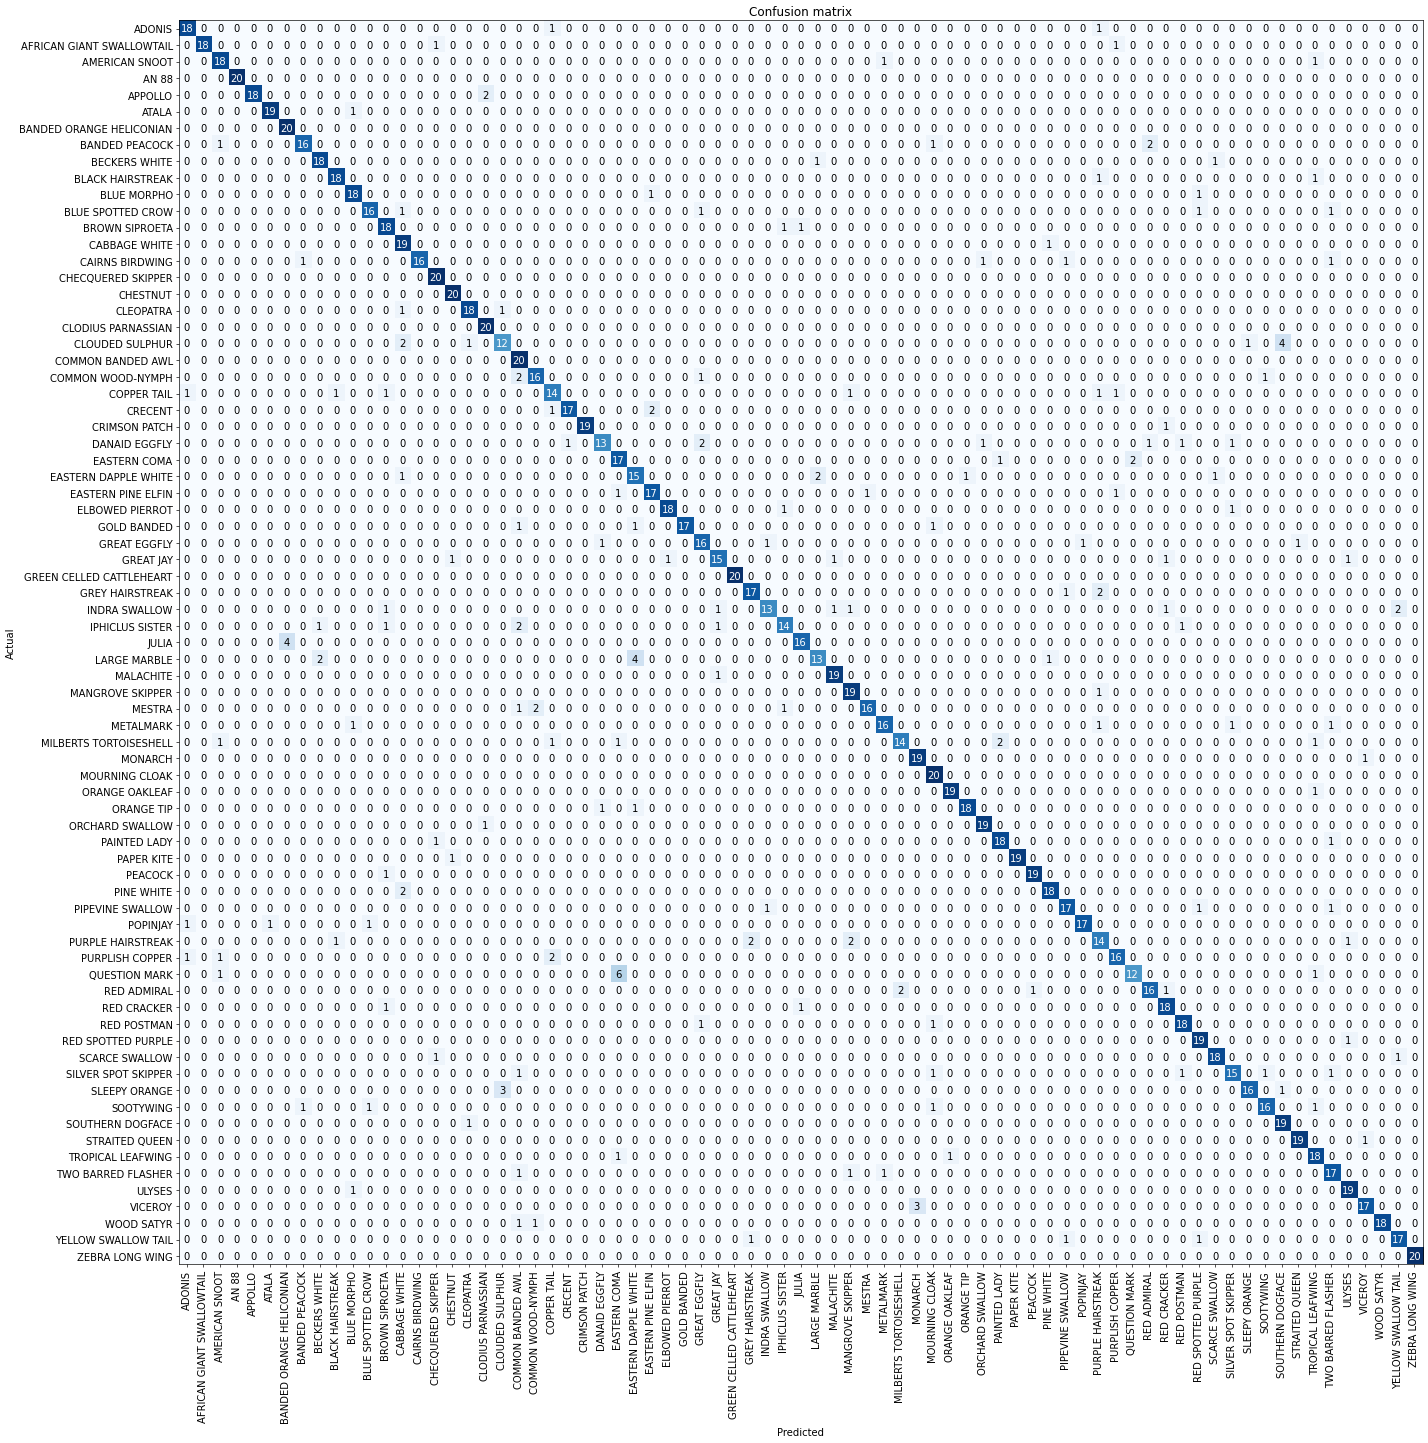

In [ ]:
# What does our confusion matrix look like now?
interpretation = ClassificationInterpretation.from_learner( learner )
interpretation.plot_confusion_matrix( figsize = ( 24, 24 ), dpi = 60 )

In [ ]:
# Looks at most confused again

print(len(interpretation.most_confused(min_val=3) ))
interpretation.most_confused(min_val=3)  # show those where they were confused with another type 3 times or more

6


[('QUESTION MARK', 'EASTERN COMA', 6),
 ('CLOUDED SULPHUR', 'SOUTHERN DOGFACE', 4),
 ('JULIA', 'BANDED ORANGE HELICONIAN', 4),
 ('LARGE MARBLE', 'EASTERN DAPPLE WHITE', 4),
 ('SLEEPY ORANGE', 'CLOUDED SULPHUR', 3),
 ('VICEROY', 'MONARCH', 3)]

In [ ]:
# Save 
path = Path('gdrive/MyDrive/data/butterflies')
exportname = 'alexnet_baseline_export.pkl'
learner.export(path/exportname)
os.listdir( path)

['6 images',
 'CLASS NAMES.csv',
 'EfficientNetB3-butterflies-0.97.h5',
 'butterflies.csv',
 'class_dict.csv',
 'test',
 'train',
 'valid',
 'alexnet_baseline_export.pkl']

In [ ]:
testpath = Path('gdrive/MyDrive/data/butterflies/test')
test_files = [filename for filename in sorted((testpath).glob('**/*')) if filename.is_file()]
test_files[0:6]

[Path('gdrive/MyDrive/data/butterflies/test/ADONIS/1.jpg'),
 Path('gdrive/MyDrive/data/butterflies/test/ADONIS/2.jpg'),
 Path('gdrive/MyDrive/data/butterflies/test/ADONIS/3.jpg'),
 Path('gdrive/MyDrive/data/butterflies/test/ADONIS/4.jpg'),
 Path('gdrive/MyDrive/data/butterflies/test/ADONIS/5.jpg'),
 Path('gdrive/MyDrive/data/butterflies/test/AFRICAN GIANT SWALLOWTAIL/1.jpg')]

In [ ]:
test_dl = learner.dls.test_dl(test_files, with_labels=True)

https://muellerzr.github.io/fastblog/2020/08/10/testdl.html

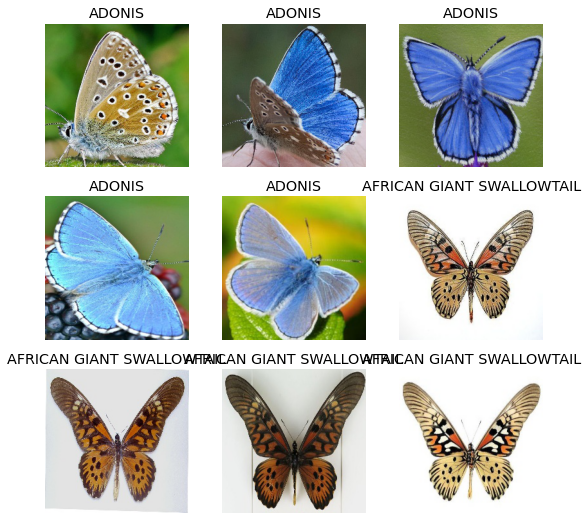

In [ ]:
test_dl.show_batch()

In [ ]:
preds, labs = learner.get_preds(dl=test_dl)

In [ ]:
labs = labs.tolist()

In [ ]:
preds
# find max pred in each tensor and compare to labs

TensorBase([[9.9900e-01, 1.2534e-07, 5.9870e-10,  ..., 1.6155e-05, 3.0998e-09, 7.6147e-11],
        [8.9910e-01, 2.8563e-06, 3.0047e-05,  ..., 2.5802e-05, 6.4329e-06, 1.1684e-06],
        [9.9921e-01, 1.5537e-08, 4.5306e-09,  ..., 3.0342e-07, 3.8182e-08, 7.6596e-09],
        ...,
        [2.2043e-07, 2.7578e-05, 2.5274e-06,  ..., 3.8445e-07, 1.9061e-04, 9.9365e-01],
        [3.2769e-07, 9.2635e-07, 1.4375e-06,  ..., 3.4745e-07, 1.8563e-04, 9.9772e-01],
        [1.2118e-08, 6.0248e-07, 1.1599e-07,  ..., 2.6870e-08, 2.2920e-05, 9.9944e-01]])

In [ ]:
predlabs = [p.index(max(p)) for p in preds.tolist()]

In [ ]:
results_df = pd.DataFrame()
results_df['pred_labs'] = predlabs
results_df['actual_labs'] = labs 
results_df

pred_labs  actual_labs
0            0            0
1            0            0
2            0            0
3            0            0
4            0            0
..         ...          ...
370         74           74
371         74           74
372         74           74
373         74           74
374         74           74

[375 rows x 2 columns]

In [ ]:
score = [n for n in list(map(int, results_df['pred_labs'] == results_df['actual_labs']))]
score

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,


In [ ]:
acc = sum(score) / len(score)
acc

0.888

In [ ]:
list(map(int, score))

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,


In [ ]:
pred6 = preds[11].tolist()

In [ ]:
pred6[0:10]

[1.7533580830786377e-05,
 8.75452533364296e-05,
 0.8745580911636353,
 5.596706614596769e-05,
 1.4619400644733105e-05,
 1.2634120139409788e-05,
 0.001474265824072063,
 0.0007815852877683938,
 1.8578411982161924e-05,
 0.0056373649276793]

In [ ]:
max(pred6)

0.8745580911636353

In [ ]:
ind = pred6.index(max(pred6))
ind

2

In [ ]:
## make list of species in alphabetical order.  ind will be the index of prediction

Path('gdrive/MyDrive/data/butterflies/test/ADONIS/3.jpg')

In [ ]:
interp = ClassificationInterpretation.from_learner(learner)

KeyboardInterrupt: ignored

In [ ]:
interp.most_confused(1)

[('QUESTION MARK', 'EASTERN COMA', 6),
 ('CLOUDED SULPHUR', 'SOUTHERN DOGFACE', 4),
 ('JULIA', 'BANDED ORANGE HELICONIAN', 4),
 ('LARGE MARBLE', 'EASTERN DAPPLE WHITE', 4),
 ('SLEEPY ORANGE', 'CLOUDED SULPHUR', 3),
 ('VICEROY', 'MONARCH', 3),
 ('APPOLLO', 'CLODIUS PARNASSIAN', 2),
 ('BANDED PEACOCK', 'RED ADMIRAL', 2),
 ('CLOUDED SULPHUR', 'CABBAGE WHITE', 2),
 ('COMMON WOOD-NYMPH', 'COMMON BANDED AWL', 2),
 ('CRECENT', 'EASTERN PINE ELFIN', 2),
 ('DANAID EGGFLY', 'GREAT EGGFLY', 2),
 ('EASTERN COMA', 'QUESTION MARK', 2),
 ('EASTERN DAPPLE WHITE', 'LARGE MARBLE', 2),
 ('GREY HAIRSTREAK', 'PURPLE HAIRSTREAK', 2),
 ('INDRA SWALLOW', 'YELLOW SWALLOW TAIL', 2),
 ('IPHICLUS SISTER', 'COMMON BANDED AWL', 2),
 ('LARGE MARBLE', 'BECKERS WHITE', 2),
 ('MESTRA', 'COMMON WOOD-NYMPH', 2),
 ('MILBERTS TORTOISESHELL', 'PAINTED LADY', 2),
 ('PINE WHITE', 'CABBAGE WHITE', 2),
 ('PURPLE HAIRSTREAK', 'GREY HAIRSTREAK', 2),
 ('PURPLE HAIRSTREAK', 'MANGROVE SKIPPER', 2),
 ('PURPLISH COPPER', 'COPPER TAIL'

# Resnet50 - 94.1% accuracy 

In [ ]:
# Let's create a learner using an existing model
learner = [] # reset learner
learner = cnn_learner( 
    loaders, # where the data comes from
    resnet50, # one of simplest pre-trained models (https://pytorch.org/vision/stable/models.html)
    metrics = [error_rate, accuracy] # supplementary metrics to display while training
    )

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [ ]:
# Train for a single epoch to confirm all things are set up properly

val_losses = []
train_losses = []

learner.fine_tune( 1 )

loss_vals = learner.recorder.values
train_losses.append(loss_vals[0][0])
val_losses.append(loss_vals[0][1])

print(train_losses)
print(val_losses)

[0.48905283212661743]
[0.27713415026664734]


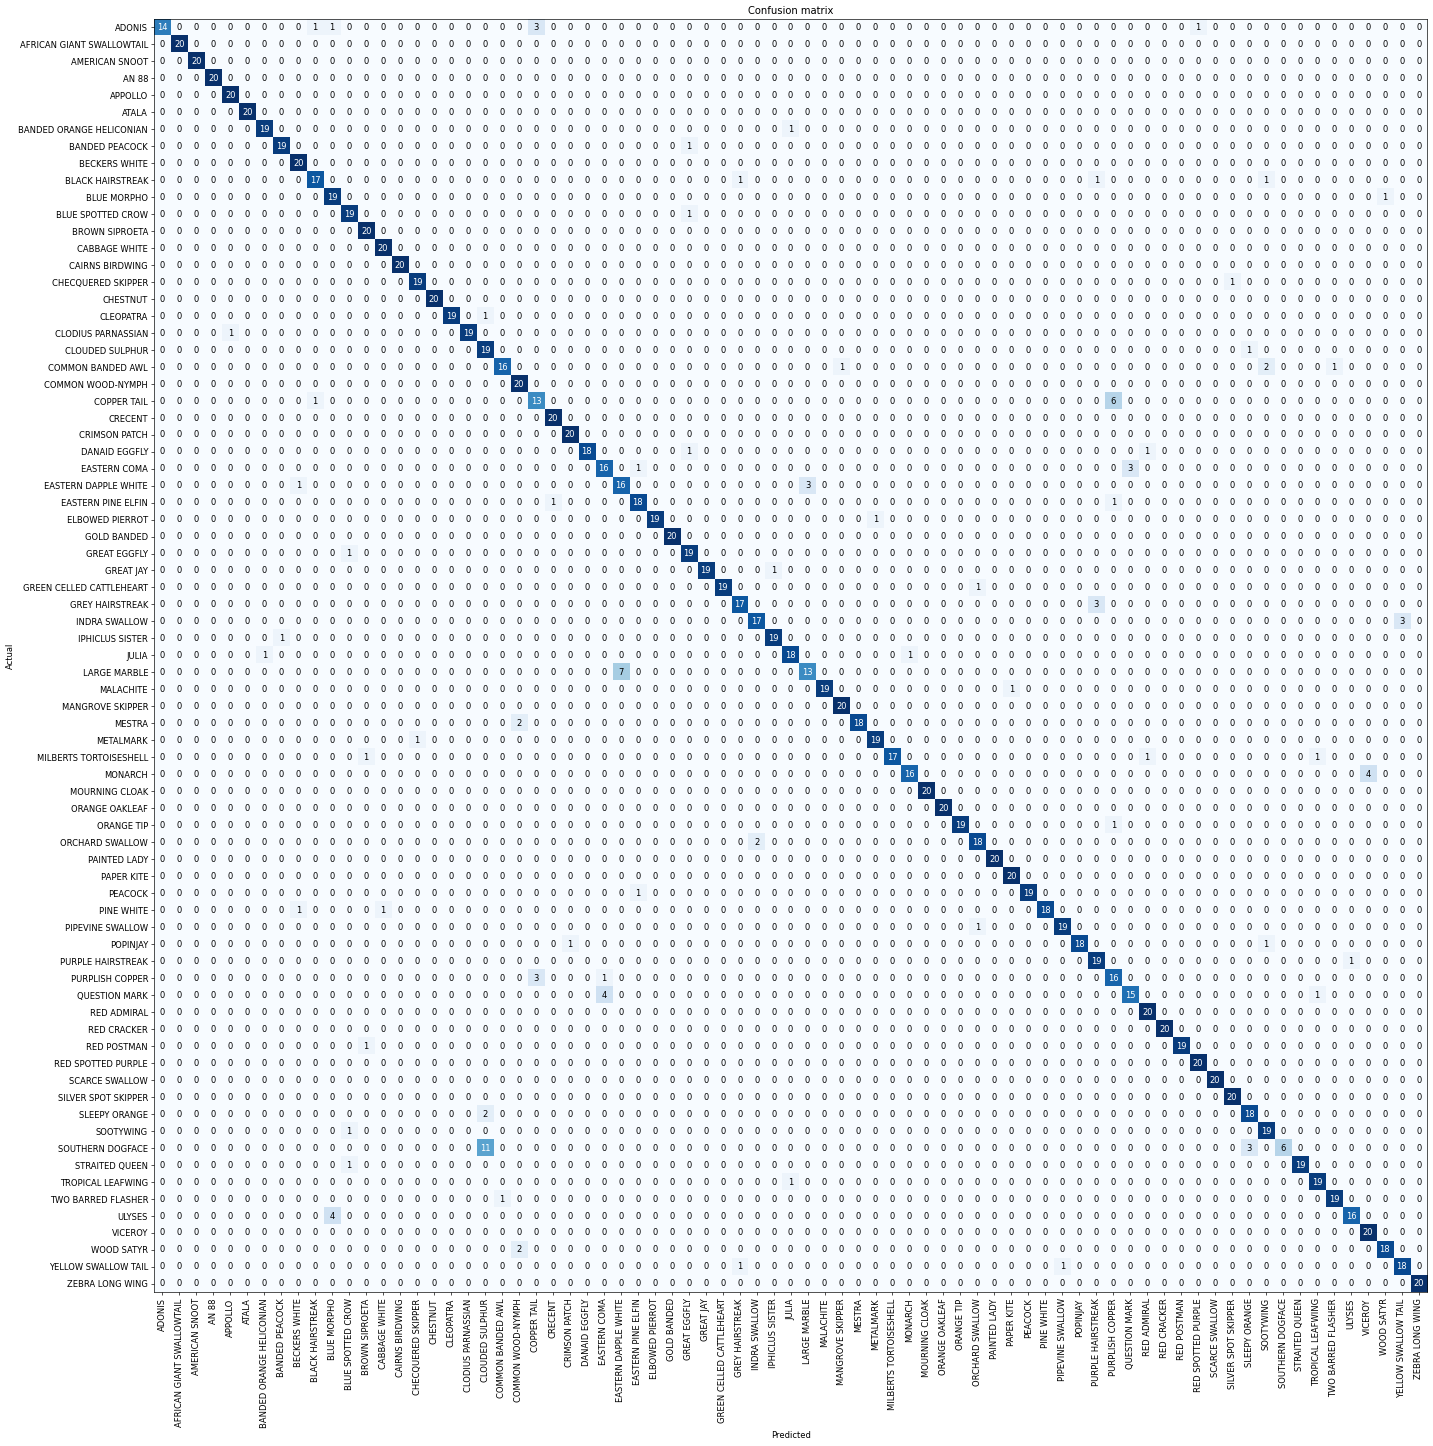

In [ ]:
#  What is our starting state?
interpretation = ClassificationInterpretation.from_learner( learner )
interpretation.plot_confusion_matrix( figsize = ( 24, 24 ), dpi = 60 )

In [ ]:
# most confused

print(len(interpretation.most_confused(min_val=5)))
interpretation.most_confused(min_val=5)  # show those with 5 incorrect predictions or more

3


[('SOUTHERN DOGFACE', 'CLOUDED SULPHUR', 11),
 ('LARGE MARBLE', 'EASTERN DAPPLE WHITE', 7),
 ('COPPER TAIL', 'PURPLISH COPPER', 6)]

LR suggestion = 6.31e-05


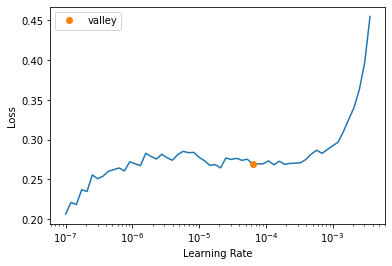

In [ ]:
# What's a good learning rate for this model-problem?
lr_suggestion = learner.lr_find( )
print( f"LR suggestion = {lr_suggestion[ 0 ]:.2e}" )

In [ ]:
lr_suggested = lr_suggestion[ 0 ]  

In [ ]:
# Run fine_tune 5 more times to see how accuracy improves

for i in range( 5 ):
  print( f"\n\nfine tuning iteration #{i+2}" )
  learner.fine_tune( 1, base_lr = lr_suggested )
  loss_vals = learner.recorder.values
  train_losses.append(loss_vals[0][0])
  val_losses.append(loss_vals[0][1])

print(train_losses)
print(val_losses)



fine tuning iteration #2




fine tuning iteration #3




fine tuning iteration #4




fine tuning iteration #5




fine tuning iteration #6


[0.48905283212661743, 0.24351055920124054, 0.22164694964885712, 0.185161754488945, 0.1730314940214157, 0.1527327299118042]
[0.27713415026664734, 0.2409440129995346, 0.23010748624801636, 0.22333048284053802, 0.2159692645072937, 0.21107164025306702]


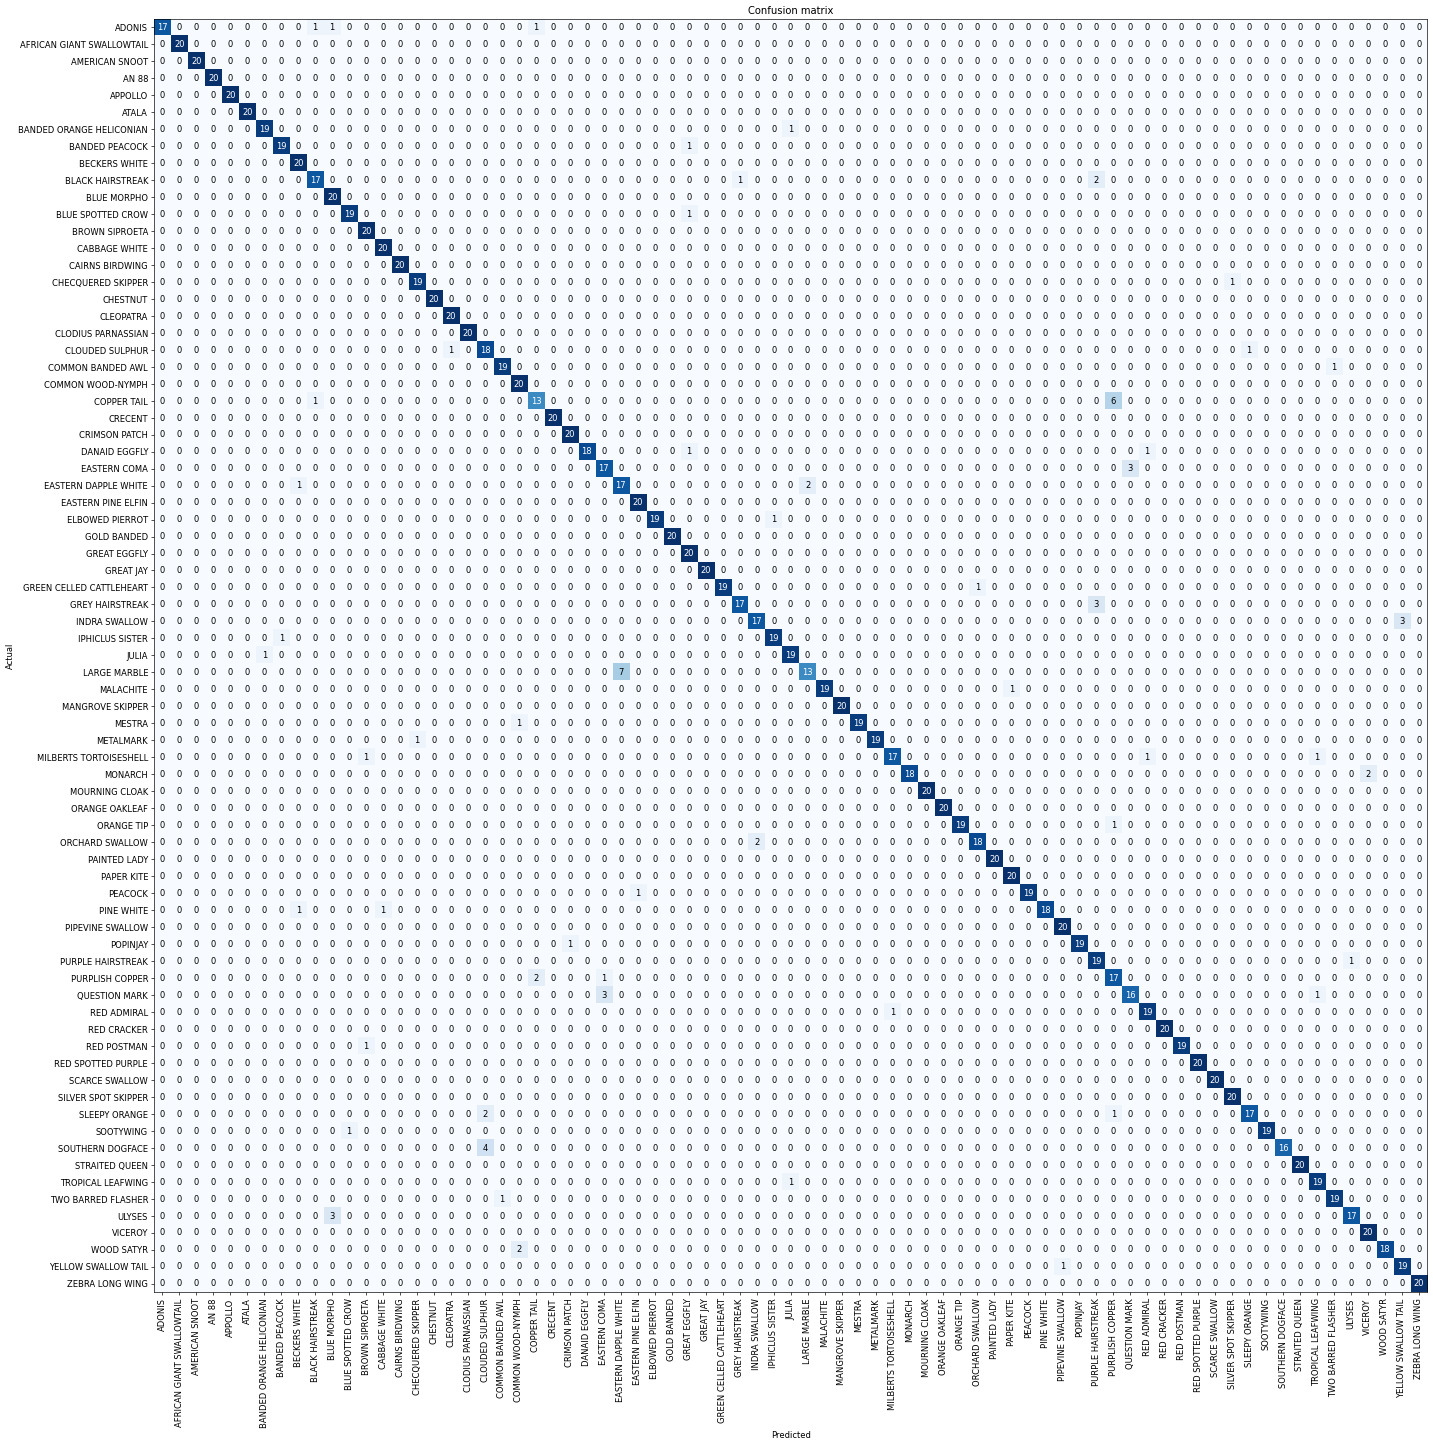

In [ ]:
# What does our confusion matrix look like now?
interpretation = ClassificationInterpretation.from_learner( learner )
interpretation.plot_confusion_matrix( figsize = ( 24, 24 ), dpi = 60 )


In [ ]:
# most confused

print(len(interpretation.most_confused(min_val=5)))
interpretation.most_confused(min_val=5)  # show those with 5 incorrect predictions or more

2


[('LARGE MARBLE', 'EASTERN DAPPLE WHITE', 7),
 ('COPPER TAIL', 'PURPLISH COPPER', 6)]

LR suggestion = 7.59e-05


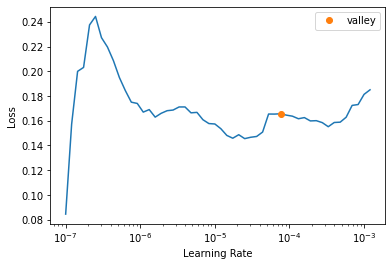

In [ ]:
# Let's continue a bit further on this one
# Should we update the learning rate?
lr_suggestion = learner.lr_find( )
print( f"LR suggestion = {lr_suggestion[ 0 ]:.2e}" )

In [ ]:
lr_suggested = 1e-05 

In [ ]:
# Run fine_tune 5 more times to see if/how accuracy improves

for i in range( 5 ):
  print( f"\n\nfine tuning iteration #{i+7}" )
  learner.fine_tune( 1, base_lr = lr_suggested )
  loss_vals = learner.recorder.values
  train_losses.append(loss_vals[0][0])
  val_losses.append(loss_vals[0][1])

print(train_losses)
print(val_losses)



fine tuning iteration #7




fine tuning iteration #8




fine tuning iteration #9




fine tuning iteration #10




fine tuning iteration #11


[0.48905283212661743, 0.24351055920124054, 0.22164694964885712, 0.185161754488945, 0.1730314940214157, 0.1527327299118042, 0.1635741889476776, 0.14117254316806793, 0.16055364906787872, 0.1361960768699646, 0.14415159821510315]
[0.27713415026664734, 0.2409440129995346, 0.23010748624801636, 0.22333048284053802, 0.2159692645072937, 0.21107164025306702, 0.2104712873697281, 0.21283070743083954, 0.21178314089775085, 0.2121921181678772, 0.21127502620220184]


In [ ]:
# Save 
path = Path('gdrive/MyDrive/data/butterflies')
exportname = 'resnet50_export.pkl'
learner.export(path/exportname)
os.listdir( path)

['6 images',
 'CLASS NAMES.csv',
 'EfficientNetB3-butterflies-0.97.h5',
 'butterflies.csv',
 'class_dict.csv',
 'test',
 'train',
 'valid',
 'alexnet_ps0noaug_50epochs_export.pkl',
 'alexnet_ps0noaug_26epochs_export.pkl',
 'alexnet_untrained_26epochs_export.pkl',
 'alexnet_noaug_26epochs_export.pkl',
 'alexnet_ps0_26epochs_export.pkl',
 'densenet201_bestmodel_export.pkl',
 'alexnet_baseline_26epochs_export.pkl',
 'resnet50_export.pkl']

# Densenet201 - 94.5% accuracy

In [ ]:
# Try Densenet201
learner = [] # reset learner
learner = cnn_learner( 
    loaders, # where the data comes from
    densenet201, 
    metrics = [error_rate, accuracy] # supplementary metrics to display while training
    )

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth


  0%|          | 0.00/77.4M [00:00<?, ?B/s]

In [ ]:
# Train for a single epoch to confirm all things are set up properly

val_losses = []
train_losses = []  

learner.fine_tune( 1 )

loss_vals = learner.recorder.values
train_losses.append(loss_vals[0][0])
val_losses.append(loss_vals[0][1])

print(train_losses)
print(val_losses)

[0.403351753950119]
[0.24485087394714355]


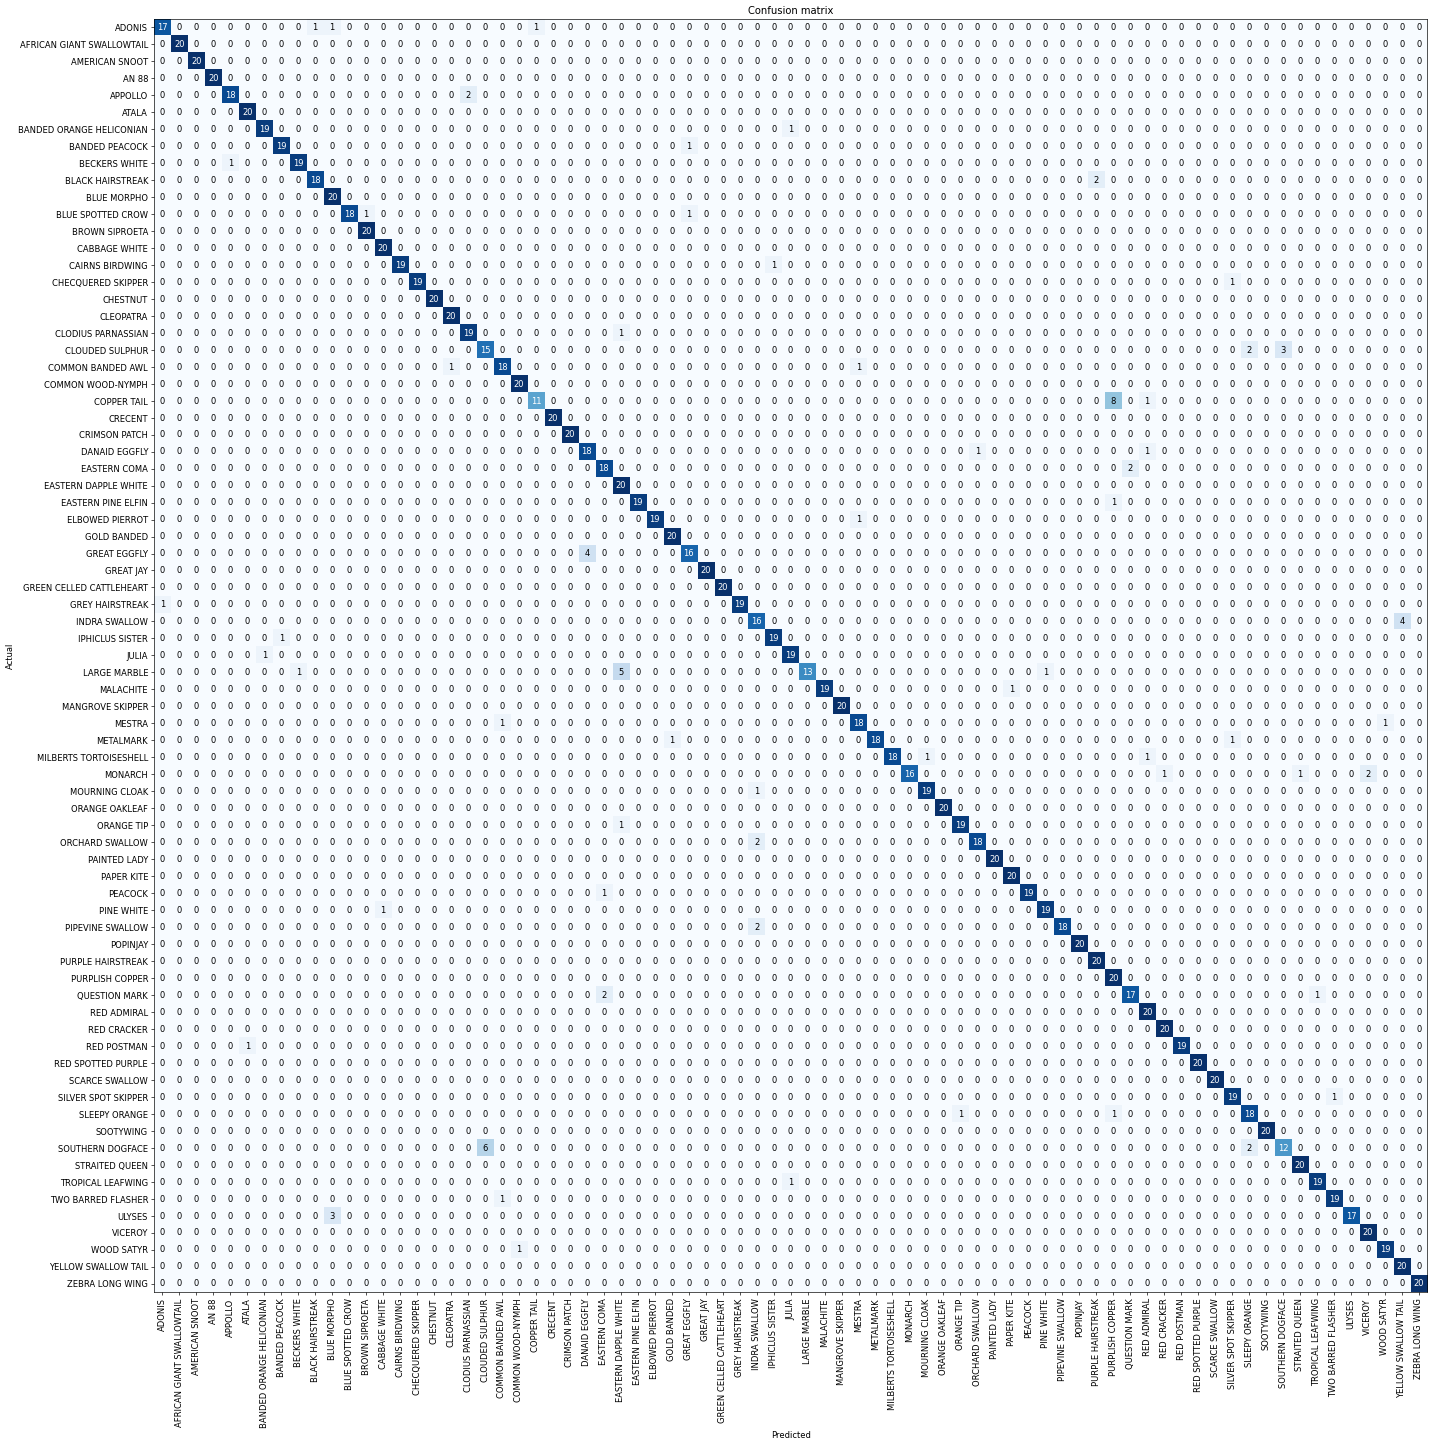

In [ ]:
#  What is our starting state?
interpretation = ClassificationInterpretation.from_learner( learner )
interpretation.plot_confusion_matrix( figsize = ( 24, 24 ), dpi = 60 )

In [ ]:
# most confused

print(len(interpretation.most_confused(min_val=5)))
interpretation.most_confused(min_val=5)  # show those with 5 incorrect predictions or more

3


[('COPPER TAIL', 'PURPLISH COPPER', 8),
 ('SOUTHERN DOGFACE', 'CLOUDED SULPHUR', 6),
 ('LARGE MARBLE', 'EASTERN DAPPLE WHITE', 5)]

LR suggestion = 1.00e-05


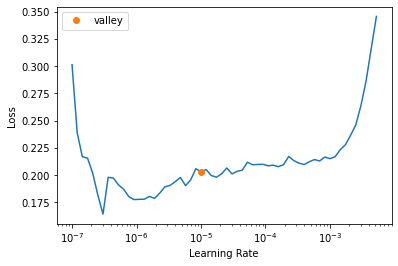

In [ ]:
# What's a good learning rate for this model-problem?
lr_suggestion = learner.lr_find( )
print( f"LR suggestion = {lr_suggestion[ 0 ]:.2e}" )

In [ ]:
lr_suggested = lr_suggestion[ 0 ]  

In [ ]:
# Run fine_tune 5 more times to see if accuracy improves

for i in range( 5 ):
  print( f"\n\nfine tuning iteration #{i+2}" )
  learner.fine_tune( 1, base_lr = lr_suggested )
  loss_vals = learner.recorder.values
  train_losses.append(loss_vals[0][0])
  val_losses.append(loss_vals[0][1])

print(train_losses)
print(val_losses)



fine tuning iteration #2




fine tuning iteration #3




fine tuning iteration #4




fine tuning iteration #5




fine tuning iteration #6


[0.403351753950119, 0.21612828969955444, 0.1986003816127777, 0.1984269767999649, 0.19975490868091583, 0.19733338057994843]
[0.24485087394714355, 0.2399054914712906, 0.23469708859920502, 0.2318526804447174, 0.22679734230041504, 0.22465482354164124]


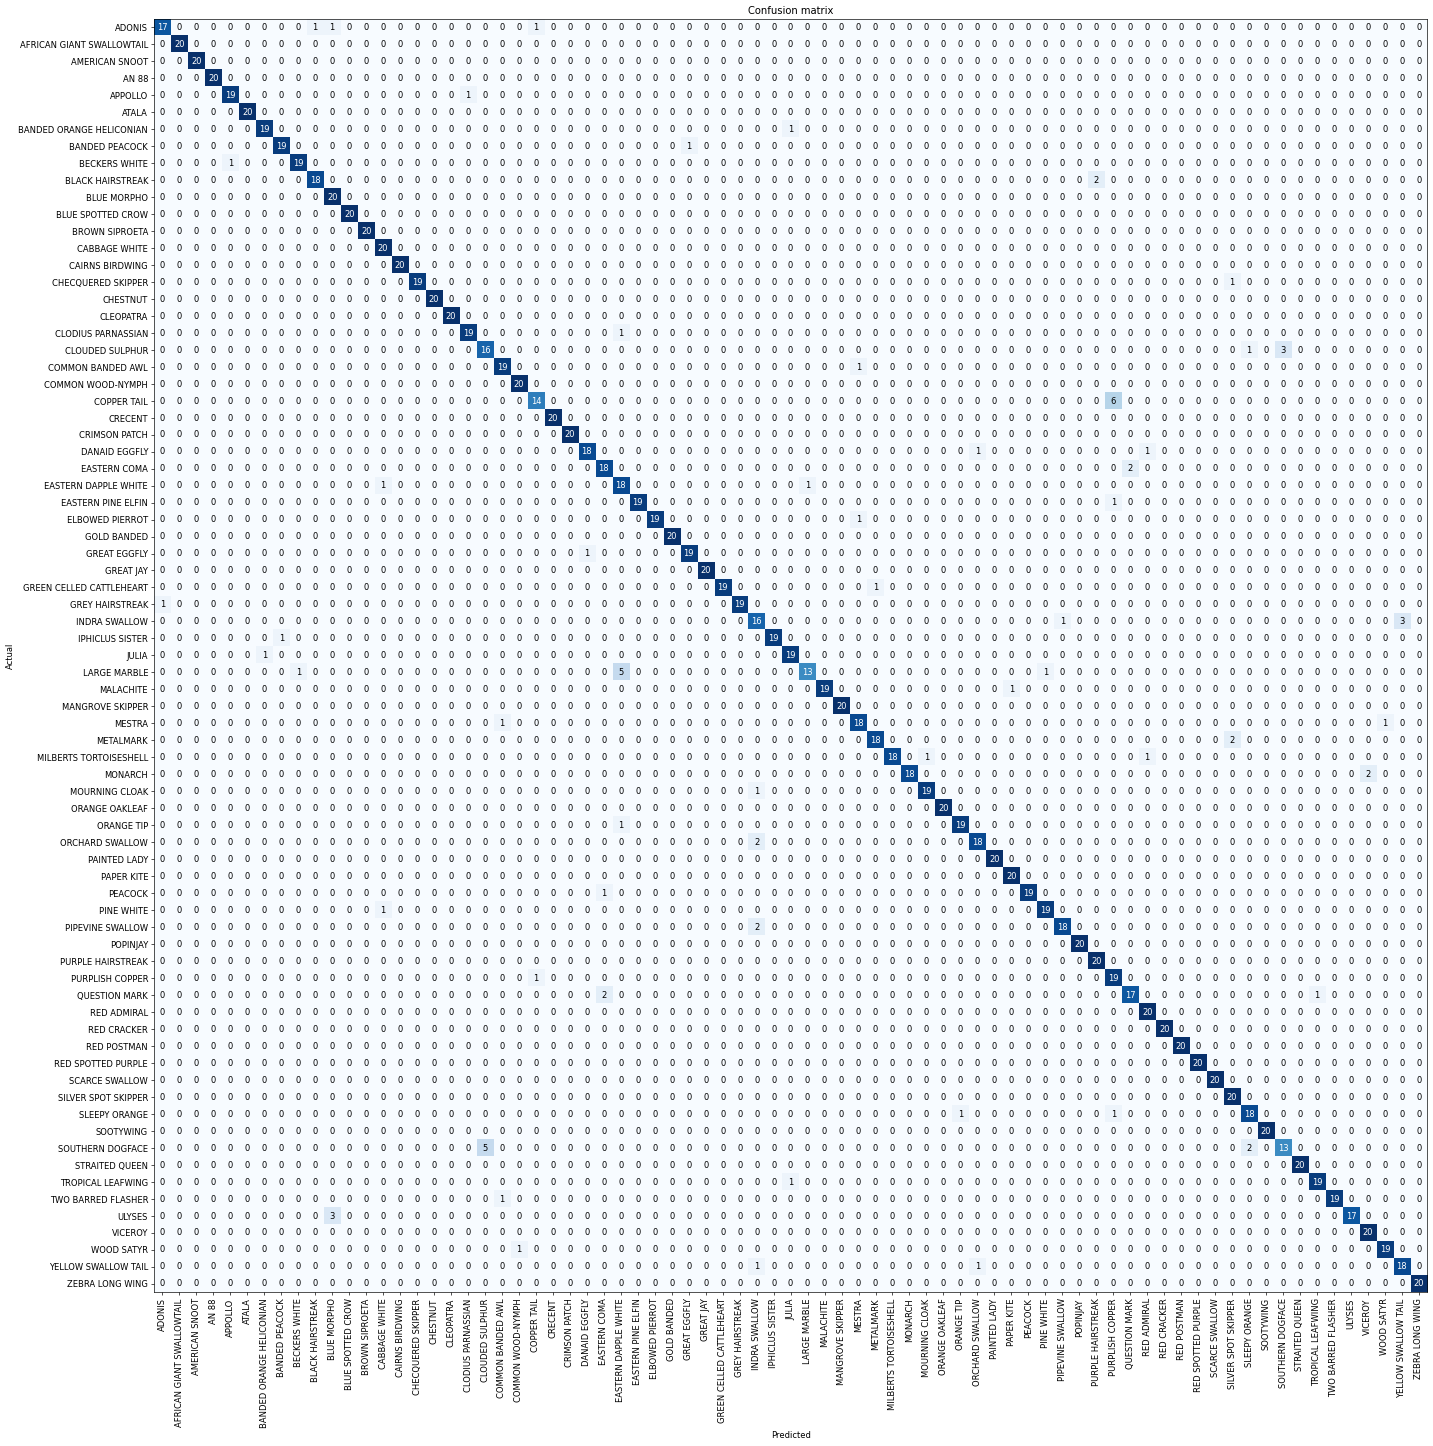

In [ ]:
# What does our confusion matrix look like now?
interpretation = ClassificationInterpretation.from_learner( learner )
interpretation.plot_confusion_matrix( figsize = ( 24, 24 ), dpi = 60 )


In [ ]:
# most confused now

print(len(interpretation.most_confused(min_val=5)))
interpretation.most_confused(min_val=5)  # show those with 5 incorrect predictions or more

3


[('COPPER TAIL', 'PURPLISH COPPER', 6),
 ('LARGE MARBLE', 'EASTERN DAPPLE WHITE', 5),
 ('SOUTHERN DOGFACE', 'CLOUDED SULPHUR', 5)]

LR suggestion = 2.75e-06


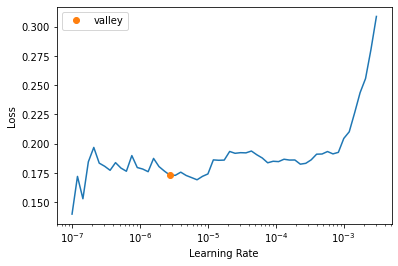

In [ ]:
# Should we update the learning rate?
lr_suggestion = learner.lr_find( )
print( f"LR suggestion = {lr_suggestion[ 0 ]:.2e}" )

In [ ]:
lr_suggested = lr_suggestion[ 0 ]  

In [ ]:
# Since both training loss and validation loss are continuing to improve, run fine_tune 5 more times

for i in range( 5 ):
  print( f"\n\nfine tuning iteration #{i+7}" )
  learner.fine_tune( 1, base_lr = lr_suggested )
  loss_vals = learner.recorder.values
  train_losses.append(loss_vals[0][0])
  val_losses.append(loss_vals[0][1])

print(train_losses)
print(val_losses)



fine tuning iteration #7




fine tuning iteration #8




fine tuning iteration #9




fine tuning iteration #10




fine tuning iteration #11


[0.403351753950119, 0.21612828969955444, 0.1986003816127777, 0.1984269767999649, 0.19975490868091583, 0.19733338057994843, 0.18871532380580902, 0.17759382724761963, 0.1984582096338272, 0.18624746799468994, 0.16906900703907013]
[0.24485087394714355, 0.2399054914712906, 0.23469708859920502, 0.2318526804447174, 0.22679734230041504, 0.22465482354164124, 0.22228741645812988, 0.2248724400997162, 0.22279372811317444, 0.2224617898464203, 0.22277984023094177]


Train_loss, valid_loss, and accuracy all seem to be pretty stable.
<br>Use this model as final.
<br><br>This seems to be the best model.

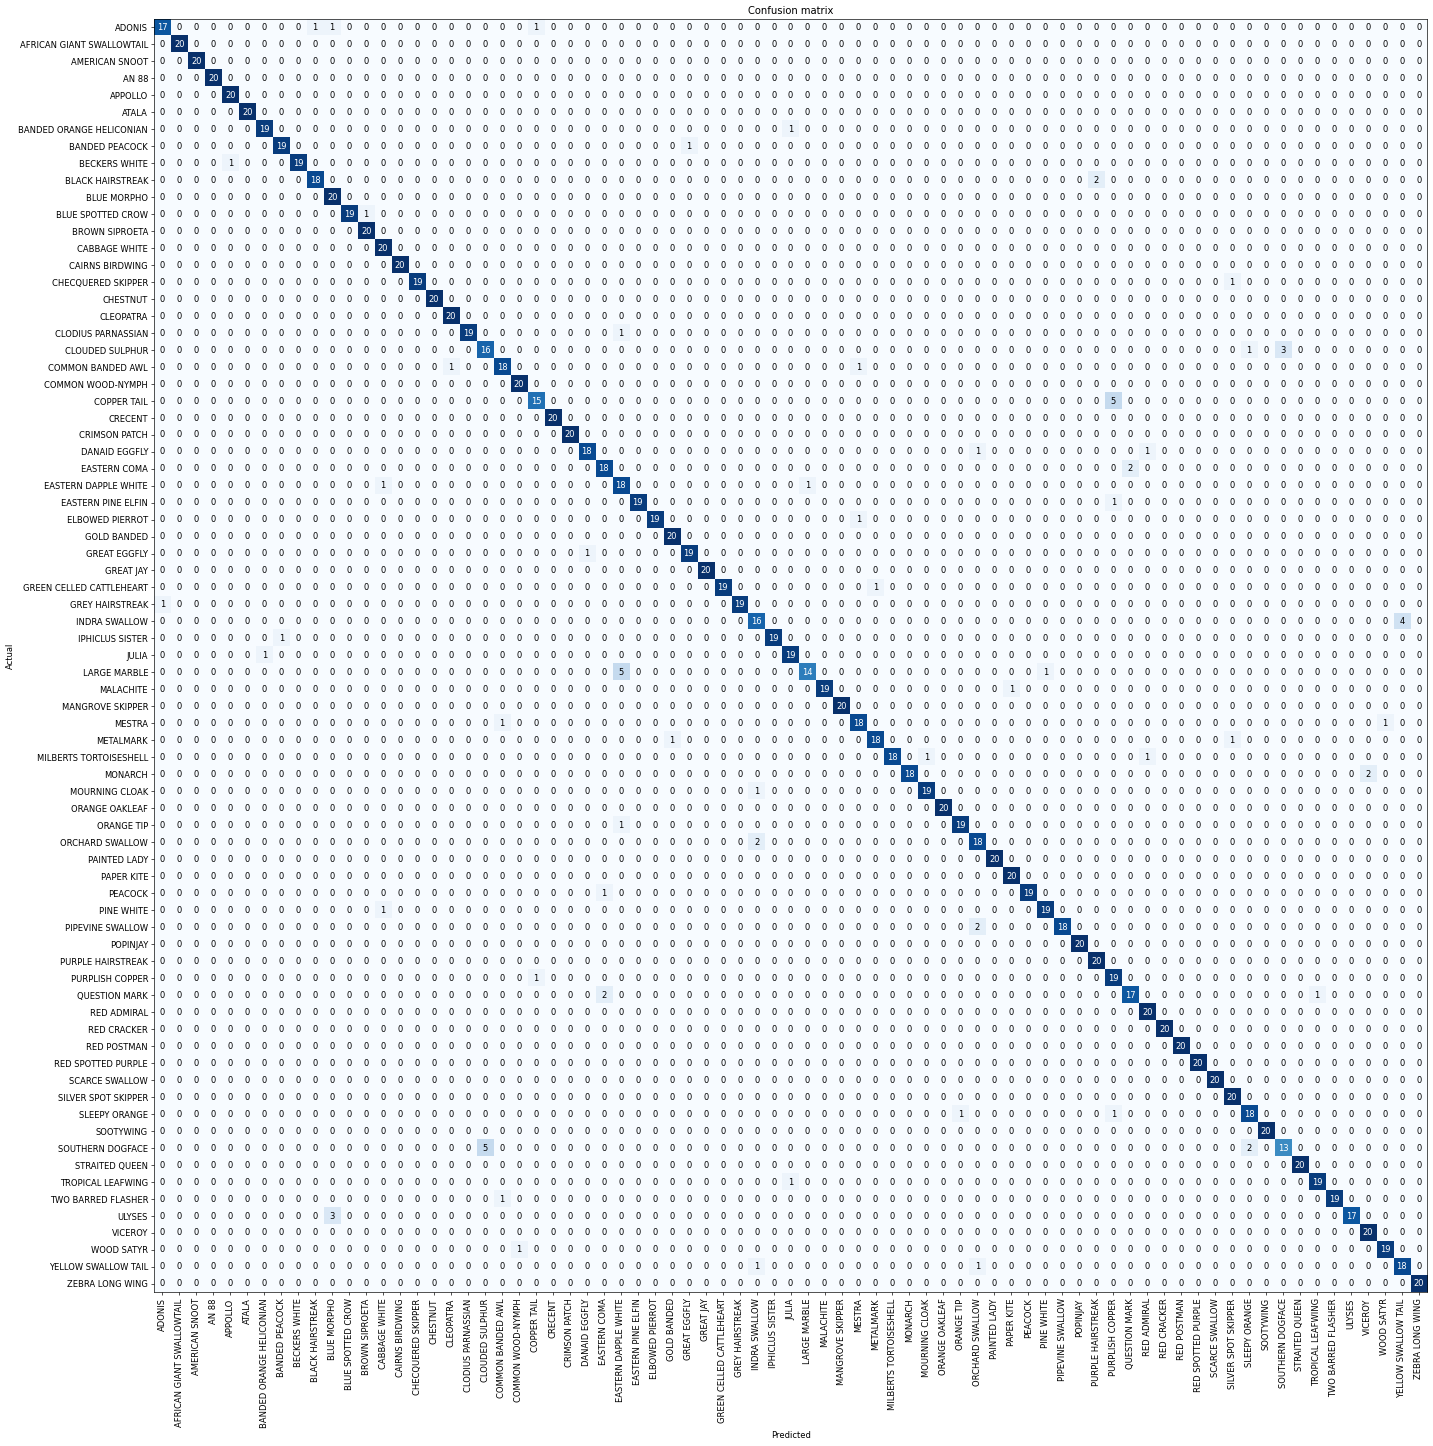

In [ ]:
# What does our confusion matrix look like now?
interpretation = ClassificationInterpretation.from_learner( learner )
interpretation.plot_confusion_matrix( figsize = ( 24, 24 ), dpi = 60 )

In [ ]:
# quick check on most confused
print(len(interpretation.most_confused(min_val=5)))
interpretation.most_confused(min_val=5)  


3


[('COPPER TAIL', 'PURPLISH COPPER', 5),
 ('LARGE MARBLE', 'EASTERN DAPPLE WHITE', 5),
 ('SOUTHERN DOGFACE', 'CLOUDED SULPHUR', 5)]

In [ ]:
# Look at most confused with a level of 2
print(len(interpretation.most_confused(min_val=2)))
interpretation.most_confused(min_val=2)  

13


[('COPPER TAIL', 'PURPLISH COPPER', 5),
 ('LARGE MARBLE', 'EASTERN DAPPLE WHITE', 5),
 ('SOUTHERN DOGFACE', 'CLOUDED SULPHUR', 5),
 ('INDRA SWALLOW', 'YELLOW SWALLOW TAIL', 4),
 ('CLOUDED SULPHUR', 'SOUTHERN DOGFACE', 3),
 ('ULYSES', 'BLUE MORPHO', 3),
 ('BLACK HAIRSTREAK', 'PURPLE HAIRSTREAK', 2),
 ('EASTERN COMA', 'QUESTION MARK', 2),
 ('MONARCH', 'VICEROY', 2),
 ('ORCHARD SWALLOW', 'INDRA SWALLOW', 2),
 ('PIPEVINE SWALLOW', 'ORCHARD SWALLOW', 2),
 ('QUESTION MARK', 'EASTERN COMA', 2),
 ('SOUTHERN DOGFACE', 'SLEEPY ORANGE', 2)]

In [ ]:
# How many images in the training data for some of these?
print(f"SOUTHERN DOGFACE:  {traincounts['SOUTHERN DOGFACE']}")
print(f"CLOUDED SULPHUR:  {traincounts['CLOUDED SULPHUR']}")
print(f"COPPER TAIL:  {traincounts['COPPER TAIL']}")
print(f"PURPLISH COPPER:  {traincounts['PURPLISH COPPER']}")
print(f"LARGE MARBLE:  {traincounts['LARGE MARBLE']}")
print(f"EASTERN DAPPLE WHITE:  {traincounts['EASTERN DAPPLE WHITE']}")

SOUTHERN DOGFACE:  125
CLOUDED SULPHUR:  131
COPPER TAIL:  134
PURPLISH COPPER:  132
LARGE MARBLE:  116
EASTERN DAPPLE WHITE:  132


In [ ]:
# Save 
path = Path('gdrive/MyDrive/data/butterflies')
exportname = 'densenet201_bestmodel_export.pkl'
learner.export(path/exportname)
os.listdir( path)

['6 images',
 'CLASS NAMES.csv',
 'EfficientNetB3-butterflies-0.97.h5',
 'butterflies.csv',
 'class_dict.csv',
 'test',
 'train',
 'valid',
 'alexnet_ps0noaug_50epochs_export.pkl',
 'alexnet_ps0noaug_26epochs_export.pkl',
 'alexnet_untrained_26epochs_export.pkl',
 'alexnet_noaug_26epochs_export.pkl',
 'alexnet_ps0_26epochs_export.pkl',
 'densenet201_bestmodel_export.pkl']

In [ ]:
# # And to come full circle, let's clear the learner, load the model and make a           ##### make this choose a random folder and random 1-5.jpg??
# # prediction on the test data folder (which we haven't touched yet) to demonstrate portability
# learner = []
# learner = load_learner( "export.pkl" )

# # Let's make a prediction using one of the test images
# file_path = os.path.join( dir, "test/MONARCH" )
# file_path = os.path.join( file_path, "1.jpg" )
# from PIL import Image
# image = Image.open( file_path )
# from matplotlib import pyplot
# pyplot.imshow( image )

# # Make a prediction
# prediction, prediction_possibility, prediction_possibilities = learner.predict( file_path )
# print( f"prediction = {prediction}\n\n" )

# Make predictions on images from test data

prediction = AFRICAN GIANT SWALLOWTAIL




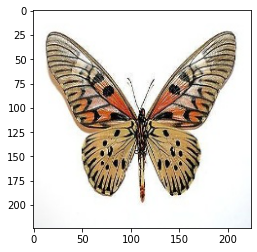

In [ ]:
from PIL import Image
from matplotlib import pyplot

# First, predict on one that had perfect prediction rate in validation set (20)

path = Path('gdrive/MyDrive/data/butterflies/test')
butterfly = 'AFRICAN GIANT SWALLOWTAIL'
testpic = '1.jpg'

p = path/butterfly/testpic
image = Image.open( p )
pyplot.imshow( image )

# Make a prediction
prediction, prediction_possibility, prediction_possibilities = learner.predict( p )
print( f"prediction = {prediction}\n\n" )

prediction = SOUTHERN DOGFACE




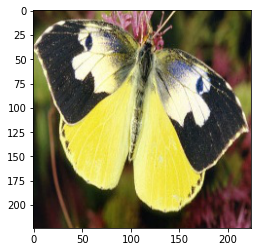

In [ ]:
# Now, let's try on some that didn't perform very well in the validation set
# Southern Dogface was the worst performer, with a total of only 13 out of 20 predicted correctly

path = Path('gdrive/MyDrive/data/butterflies/test')
butterfly = 'SOUTHERN DOGFACE'
testpic = '1.jpg'

p = path/butterfly/testpic
image = Image.open( p )
pyplot.imshow( image )

# Make a prediction
prediction, prediction_possibility, prediction_possibilities = learner.predict( p )
print( f"prediction = {prediction}\n\n" )

prediction = SOUTHERN DOGFACE




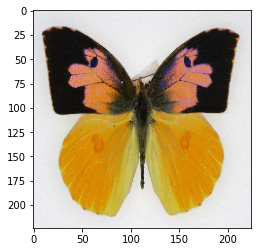

In [ ]:
# Let's try another one of those

path = Path('gdrive/MyDrive/data/butterflies/test')
butterfly = 'SOUTHERN DOGFACE'
testpic = '2.jpg'

p = path/butterfly/testpic
image = Image.open( p )
pyplot.imshow( image )

# Make a prediction
prediction, prediction_possibility, prediction_possibilities = learner.predict( p )
print( f"prediction = {prediction}\n\n" )

prediction = SOUTHERN DOGFACE




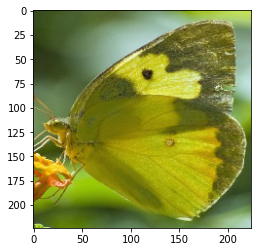

In [ ]:
# Now, let's try on some that didn't perform very well in the validation set
# Southern Dogface was the worst performer, with a total of only 13 out of 20 predicted correctly

path = Path('gdrive/MyDrive/data/butterflies/test')
butterfly = 'SOUTHERN DOGFACE'
testpic = '3.jpg'

p = path/butterfly/testpic
image = Image.open( p )
pyplot.imshow( image )

# Make a prediction
prediction, prediction_possibility, prediction_possibilities = learner.predict( p )
print( f"prediction = {prediction}\n\n" )

prediction = SOUTHERN DOGFACE




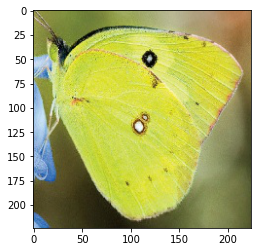

In [ ]:
# Now, let's try on some that didn't perform very well in the validation set
# Southern Dogface was the worst performer, with a total of only 13 out of 20 predicted correctly

path = Path('gdrive/MyDrive/data/butterflies/test')
butterfly = 'SOUTHERN DOGFACE'
testpic = '4.jpg'

p = path/butterfly/testpic
image = Image.open( p )
pyplot.imshow( image )

# Make a prediction
prediction, prediction_possibility, prediction_possibilities = learner.predict( p )
print( f"prediction = {prediction}\n\n" )

prediction = SOUTHERN DOGFACE




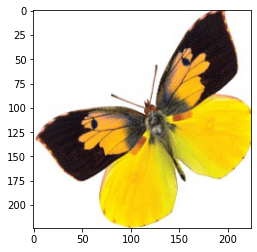

In [ ]:
# Now, let's try on some that didn't perform very well in the validation set
# Southern Dogface was the worst performer, with a total of only 13 out of 20 predicted correctly

path = Path('gdrive/MyDrive/data/butterflies/test')
butterfly = 'SOUTHERN DOGFACE'
testpic = '5.jpg'

p = path/butterfly/testpic
image = Image.open( p )
pyplot.imshow( image )

# Make a prediction
prediction, prediction_possibility, prediction_possibilities = learner.predict( p )
print( f"prediction = {prediction}\n\n" )

prediction = COPPER TAIL




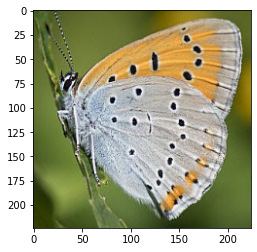

In [ ]:
# Southern Dogface performed better than expected
# Try Copper Tail

path = Path('gdrive/MyDrive/data/butterflies/test')
butterfly = 'COPPER TAIL'
testpic = '1.jpg'

p = path/butterfly/testpic
image = Image.open( p )
pyplot.imshow( image )

# Make a prediction
prediction, prediction_possibility, prediction_possibilities = learner.predict( p )
print( f"prediction = {prediction}\n\n" )

prediction = COPPER TAIL




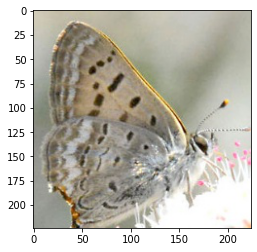

In [ ]:
# Southern Dogface performed better than expected
# Try Copper Tail

path = Path('gdrive/MyDrive/data/butterflies/test')
butterfly = 'COPPER TAIL'
testpic = '2.jpg'

p = path/butterfly/testpic
image = Image.open( p )
pyplot.imshow( image )

# Make a prediction
prediction, prediction_possibility, prediction_possibilities = learner.predict( p )
print( f"prediction = {prediction}\n\n" )

prediction = PURPLISH COPPER




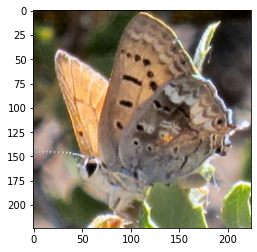

In [ ]:
# Southern Dogface performed better than expected
# Try Copper Tail

path = Path('gdrive/MyDrive/data/butterflies/test')
butterfly = 'COPPER TAIL'
testpic = '3.jpg'

p = path/butterfly/testpic
image = Image.open( p )
pyplot.imshow( image )

# Make a prediction
prediction, prediction_possibility, prediction_possibilities = learner.predict( p )
print( f"prediction = {prediction}\n\n" )

AH HA!  Finally got one wrong!

prediction = CRECENT




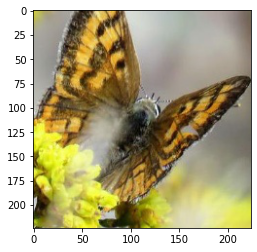

In [ ]:
# Southern Dogface performed better than expected
# Try Copper Tail

path = Path('gdrive/MyDrive/data/butterflies/test')
butterfly = 'COPPER TAIL'
testpic = '4.jpg'

p = path/butterfly/testpic
image = Image.open( p )
pyplot.imshow( image )

# Make a prediction
prediction, prediction_possibility, prediction_possibilities = learner.predict( p )
print( f"prediction = {prediction}\n\n" )

Uh oh!  Losing streak.

prediction = COPPER TAIL




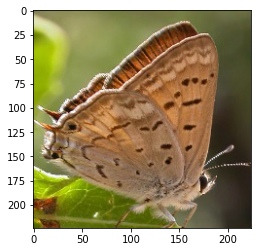

In [ ]:
# Southern Dogface performed better than expected
# Try Copper Tail

path = Path('gdrive/MyDrive/data/butterflies/test')
butterfly = 'COPPER TAIL'
testpic = '5.jpg'

p = path/butterfly/testpic
image = Image.open( p )
pyplot.imshow( image )

# Make a prediction
prediction, prediction_possibility, prediction_possibilities = learner.predict( p )
print( f"prediction = {prediction}\n\n" )

prediction = PURPLISH COPPER




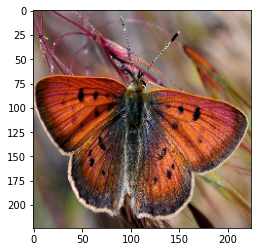

In [ ]:
# Try some more of the less good performers

path = Path('gdrive/MyDrive/data/butterflies/test')
butterfly = 'PURPLISH COPPER'
testpic = '1.jpg'

p = path/butterfly/testpic
image = Image.open( p )
pyplot.imshow( image )

# Make a prediction
prediction, prediction_possibility, prediction_possibilities = learner.predict( p )
print( f"prediction = {prediction}\n\n" )

prediction = LARGE MARBLE




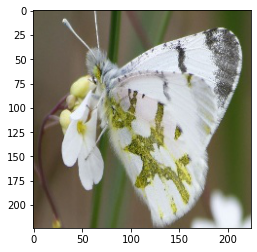

In [ ]:
# Try some more of the less good performers

path = Path('gdrive/MyDrive/data/butterflies/test')
butterfly = 'LARGE MARBLE'
testpic = '1.jpg'

p = path/butterfly/testpic
image = Image.open( p )
pyplot.imshow( image )

# Make a prediction
prediction, prediction_possibility, prediction_possibilities = learner.predict( p )
print( f"prediction = {prediction}\n\n" )

prediction = EASTERN DAPPLE WHITE




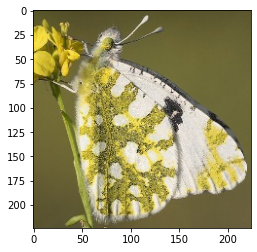

In [ ]:
# Try some more of the less good performers

path = Path('gdrive/MyDrive/data/butterflies/test')
butterfly = 'EASTERN DAPPLE WHITE'
testpic = '1.jpg'

p = path/butterfly/testpic
image = Image.open( p )
pyplot.imshow( image )

# Make a prediction
prediction, prediction_possibility, prediction_possibilities = learner.predict( p )
print( f"prediction = {prediction}\n\n" )

prediction = CLOUDED SULPHUR




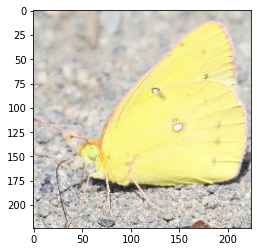

In [ ]:
# Try some more of the less good performers

path = Path('gdrive/MyDrive/data/butterflies/test')
butterfly = 'CLOUDED SULPHUR'
testpic = '1.jpg'

p = path/butterfly/testpic
image = Image.open( p )
pyplot.imshow( image )

# Make a prediction
prediction, prediction_possibility, prediction_possibilities = learner.predict( p )
print( f"prediction = {prediction}\n\n" )

prediction = INDRA SWALLOW




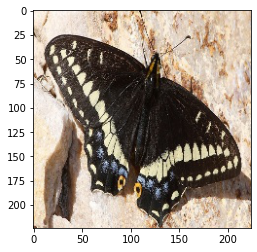

In [ ]:
# Try some more of the less good performers

path = Path('gdrive/MyDrive/data/butterflies/test')
butterfly = 'INDRA SWALLOW'
testpic = '1.jpg'

p = path/butterfly/testpic
image = Image.open( p )
pyplot.imshow( image )

# Make a prediction
prediction, prediction_possibility, prediction_possibilities = learner.predict( p )
print( f"prediction = {prediction}\n\n" )

prediction = YELLOW SWALLOW TAIL




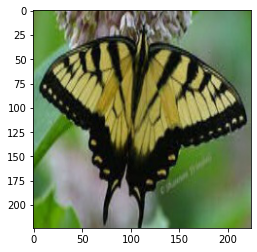

In [ ]:
# Try some more of the less good performers

path = Path('gdrive/MyDrive/data/butterflies/test')
butterfly = 'YELLOW SWALLOW TAIL'
testpic = '1.jpg'

p = path/butterfly/testpic
image = Image.open( p )
pyplot.imshow( image )

# Make a prediction
prediction, prediction_possibility, prediction_possibilities = learner.predict( p )
print( f"prediction = {prediction}\n\n" )


Pretty impressive overall!

# Alexnet base model to compare overfitting 


In [ ]:
# baseline for overfitting 
block = DataBlock( 
    blocks = ( ImageBlock, CategoryBlock ), 
    get_items = get_image_files, 
    splitter =  GrandparentSplitter(),   
    get_y = parent_label,  
    item_tfms = Resize( 224 ), 
    batch_tfms = aug_transforms( ) 
    )

# create dataloader
loaders = block.dataloaders( dir )
print( f"loaders:\n{loaders}" )

loaders:


In [ ]:
# setup learner
learner = [] # reset learner
learner = cnn_learner( 
    loaders, 
    alexnet, 
    metrics = [error_rate, accuracy]
    )

In [ ]:
learner.fine_tune(25)  # default learning rate of 2e-3 is probably a little bigger than i'd prefer, but it makes the things i want to happen (overfitting) in less epochs

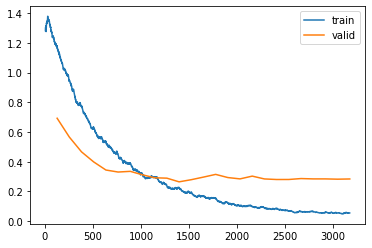

In [ ]:
learner.recorder.plot_loss()

In [ ]:
# Save this
path = Path('gdrive/MyDrive/data/butterflies')
exportname = 'alexnet_baseline_26epochs_export.pkl'
learner.export(path/exportname)
os.listdir( path)

['6 images',
 'CLASS NAMES.csv',
 'EfficientNetB3-butterflies-0.97.h5',
 'butterflies.csv',
 'class_dict.csv',
 'test',
 'train',
 'valid',
 'alexnet_ps0noaug_50epochs_export.pkl',
 'alexnet_ps0noaug_26epochs_export.pkl',
 'alexnet_untrained_26epochs_export.pkl',
 'alexnet_noaug_26epochs_export.pkl',
 'alexnet_ps0_26epochs_export.pkl',
 'densenet201_bestmodel_export.pkl',
 'alexnet_baseline_26epochs_export.pkl']

# Alexnet large number epochs


In [ ]:
# baseline for overfitting 
block = DataBlock( 
    blocks = ( ImageBlock, CategoryBlock ), 
    get_items = get_image_files, 
    splitter =  GrandparentSplitter(),   
    get_y = parent_label,  
    item_tfms = Resize( 224 ), 
    batch_tfms = aug_transforms( ) 
    )

# create dataloader
loaders = block.dataloaders( dir )
print( f"loaders:\n{loaders}" )

loaders:


In [ ]:
# setup learner
learner = [] # reset learner
learner = cnn_learner( 
    loaders, 
    alexnet, 
    metrics = [error_rate, accuracy]
    )

In [ ]:
learner.fine_tune(120)  # default learning rate of 2e-3 is probably a little bigger than i'd prefer, but it makes the things i want to happen (overfitting) in less epochs

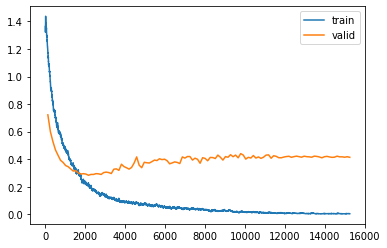

In [ ]:
learner.recorder.plot_loss()

In [ ]:
# Save this
path = Path('gdrive/MyDrive/data/butterflies')
exportname = 'alexnet_120epochs_export.pkl'
learner.export(path/exportname)
os.listdir( path)

['6 images',
 'CLASS NAMES.csv',
 'EfficientNetB3-butterflies-0.97.h5',
 'butterflies.csv',
 'class_dict.csv',
 'test',
 'train',
 'valid',
 'alexnet_120epochs_export.pkl']

# Alexnet no dropout, no augmentation

In [ ]:

dir = 'gdrive/MyDrive/data/butterflies'
block = DataBlock( 
    blocks = ( ImageBlock, CategoryBlock ), 
    get_items = get_image_files, 
    splitter =  GrandparentSplitter(),   
    get_y = parent_label,  
    item_tfms = Resize( 224 ), 
    #batch_tfms = aug_transforms( ) 
    batch_tfms = None
    )

# create dataloader
loaders = block.dataloaders( dir )
print( f"loaders:\n{loaders}" )

loaders:


In [ ]:
# setup learner
learner = [] # reset learner
learner = cnn_learner( 
    loaders, 
    alexnet, 
    ps=0,
    metrics = [error_rate, accuracy]
    )

In [ ]:
learner.fine_tune(25)  # default learning rate of 2e-3 is probably a little bigger than i'd prefer, but it makes the things i want to happen (overfitting) in less epochs

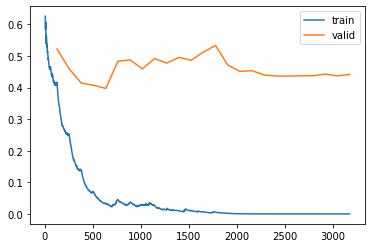

In [ ]:
learner.recorder.plot_loss()

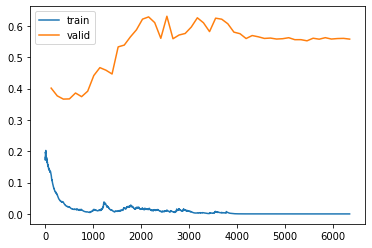

In [ ]:
#learner.recorder.plot_loss()    # from a previous iteration.  keeping because i like it.

In [ ]:
# Save this
path = Path('gdrive/MyDrive/data/butterflies')
exportname = 'alexnet_ps0noaug_26epochs_export.pkl'
learner.export(path/exportname)
os.listdir( path)

['6 images',
 'CLASS NAMES.csv',
 'EfficientNetB3-butterflies-0.97.h5',
 'butterflies.csv',
 'class_dict.csv',
 'test',
 'train',
 'valid',
 'alexnet_ps0noaug_50epochs_export.pkl',
 'alexnet_ps0noaug_26epochs_export.pkl']

# Alexnet no augmentation

In [ ]:

dir = 'gdrive/MyDrive/data/butterflies'
block = DataBlock( 
    blocks = ( ImageBlock, CategoryBlock ), 
    get_items = get_image_files, 
    splitter =  GrandparentSplitter(),   
    get_y = parent_label,  
    item_tfms = Resize( 224 ), 
    #batch_tfms = aug_transforms( ) 
    batch_tfms = None
    )

# create dataloader
loaders = block.dataloaders( dir )
print( f"loaders:\n{loaders}" )

loaders:


In [ ]:
# setup learner
learner = [] # reset learner
learner = cnn_learner( 
    loaders, 
    alexnet, 
    metrics = [error_rate, accuracy]
    )

In [ ]:
learner.fine_tune(25)  # default learning rate of 2e-3 is probably a little bigger than i'd prefer, but it makes the things i want to happen (overfitting) in less epochs

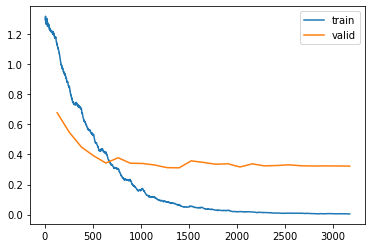

In [ ]:
learner.recorder.plot_loss()

In [ ]:
# Save this
path = Path('gdrive/MyDrive/data/butterflies')
exportname = 'alexnet_noaug_26epochs_export.pkl'
learner.export(path/exportname)
os.listdir( path)

['6 images',
 'CLASS NAMES.csv',
 'EfficientNetB3-butterflies-0.97.h5',
 'butterflies.csv',
 'class_dict.csv',
 'test',
 'train',
 'valid',
 'alexnet_ps0noaug_50epochs_export.pkl',
 'alexnet_ps0noaug_26epochs_export.pkl',
 'alexnet_untrained_26epochs_export.pkl',
 'alexnet_noaug_26epochs_export.pkl']

# Alexnet no dropout

In [ ]:

dir = 'gdrive/MyDrive/data/butterflies'
block = DataBlock( 
    blocks = ( ImageBlock, CategoryBlock ), 
    get_items = get_image_files, 
    splitter =  GrandparentSplitter(),   
    get_y = parent_label,  
    item_tfms = Resize( 224 ), 
    #batch_tfms = aug_transforms( ) 
    batch_tfms = aug_transforms( ) 
    )

# create dataloader
loaders = block.dataloaders( dir )
print( f"loaders:\n{loaders}" )

loaders:


In [ ]:
# setup learner
learner = [] # reset learner
learner = cnn_learner( 
    loaders, 
    alexnet, 
    ps=0,
    metrics = [error_rate, accuracy]
    )

In [ ]:
learner.fine_tune(25)  # default learning rate of 2e-3 is probably a little bigger than i'd prefer, but it makes the things i want to happen (overfitting) in less epochs

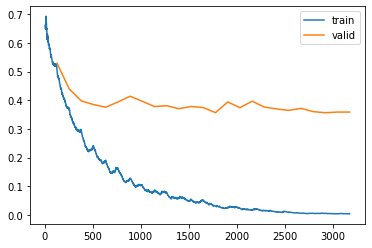

In [ ]:
learner.recorder.plot_loss()

In [ ]:
# Save this
path = Path('gdrive/MyDrive/data/butterflies')
exportname = 'alexnet_ps0_26epochs_export.pkl'
learner.export(path/exportname)
os.listdir( path)

['6 images',
 'CLASS NAMES.csv',
 'EfficientNetB3-butterflies-0.97.h5',
 'butterflies.csv',
 'class_dict.csv',
 'test',
 'train',
 'valid',
 'alexnet_ps0noaug_50epochs_export.pkl',
 'alexnet_ps0noaug_26epochs_export.pkl',
 'alexnet_untrained_26epochs_export.pkl',
 'alexnet_noaug_26epochs_export.pkl',
 'alexnet_ps0_26epochs_export.pkl']

# Alexnet untrained

In [ ]:

dir = 'gdrive/MyDrive/data/butterflies'
block = DataBlock( 
    blocks = ( ImageBlock, CategoryBlock ), 
    get_items = get_image_files, 
    splitter =  GrandparentSplitter(),   
    get_y = parent_label,  
    item_tfms = Resize( 224 ), 
    batch_tfms = aug_transforms( ) 
    )

# create dataloader
loaders = block.dataloaders( dir )
print( f"loaders:\n{loaders}" )

loaders:


In [ ]:
# setup learner
learner = [] # reset learner
learner = cnn_learner( 
    loaders, 
    alexnet, 
    pretrained = False,
    metrics = [error_rate, accuracy]
    )

In [ ]:
learner.fine_tune(25)  #  don't delete this, but do another block w/ 50? epochs 

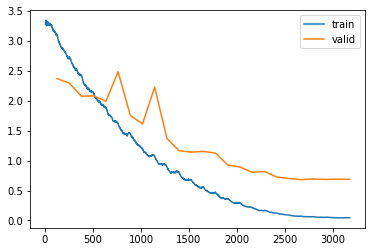

In [ ]:
learner.recorder.plot_loss()

In [ ]:
# Save this
path = Path('gdrive/MyDrive/data/butterflies')
exportname = 'alexnet_untrained_26epochs_export.pkl'
learner.export(path/exportname)
os.listdir( path)

['6 images',
 'CLASS NAMES.csv',
 'EfficientNetB3-butterflies-0.97.h5',
 'butterflies.csv',
 'class_dict.csv',
 'test',
 'train',
 'valid',
 'alexnet_ps0noaug_50epochs_export.pkl',
 'alexnet_ps0noaug_26epochs_export.pkl',
 'alexnet_untrained_26epochs_export.pkl']

# Alexnet untrained - large number epochs

In [ ]:

dir = 'gdrive/MyDrive/data/butterflies'
block = DataBlock( 
    blocks = ( ImageBlock, CategoryBlock ), 
    get_items = get_image_files, 
    splitter =  GrandparentSplitter(),   
    get_y = parent_label,  
    item_tfms = Resize( 224 ), 
    batch_tfms = aug_transforms( ) 
    )

# create dataloader
loaders = block.dataloaders( dir )
print( f"loaders:\n{loaders}" )

loaders:


In [ ]:
# setup learner
learner = [] # reset learner
learner = cnn_learner( 
    loaders, 
    alexnet, 
    pretrained = False,
    metrics = [error_rate, accuracy]
    )

In [ ]:
learner.fine_tune(120)  #  don't delete this, but do another block w/ 50? epochs 

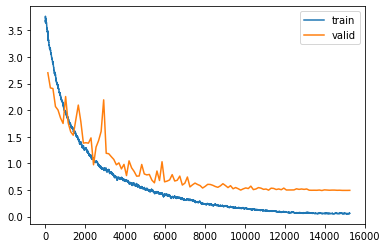

In [ ]:
learner.recorder.plot_loss()

In [ ]:
# Save this
path = Path('gdrive/MyDrive/data/butterflies')
exportname = 'alexnet_untrained_120epochs_export.pkl'
learner.export(path/exportname)
os.listdir( path)

['6 images',
 'CLASS NAMES.csv',
 'EfficientNetB3-butterflies-0.97.h5',
 'butterflies.csv',
 'class_dict.csv',
 'test',
 'train',
 'valid',
 'alexnet_120epochs_export.pkl',
 'alexnet_untrained_120epochs_export.pkl']